# **Data Analysis**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from matplotlib.ticker import MaxNLocator
df = pd.read_csv("/kaggle/input/economic-data-life-after-covid/economic data.csv")

In [2]:
df.head(10)


,country,date,manufacturing pmi,services pmi,consumer confidence,interest rates,cpi yoy,core cpi,unemployment rate,gdp yoy,ticker,open,high,low,close
0,australia,2020-01-01,49.6,50.6,93.4,0.75%,2.20%,1.70%,5.20%,1.20%,audusd,0.7021,0.7031,0.6682,0.6691
1,australia,2020-02-01,50.2,49.0,95.5,0.75%,2.20%,1.70%,5.10%,1.20%,audusd,0.6690,0.6776,0.6434,0.6509
2,australia,2020-03-01,49.7,38.5,91.9,0.50%,2.20%,1.70%,5.20%,1.20%,audusd,0.6488,0.6686,0.5507,0.6135
3,australia,2020-04-01,44.1,19.5,75.6,0.25%,-0.30%,1.20%,6.30%,-6.10%,audusd,0.6133,0.6571,0.5979,0.6510
4,australia,2020-05-01,44.0,26.9,88.1,0.25%,-0.30%,1.20%,7.00%,-6.10%,audusd,0.6511,0.6684,0.6371,0.6666
5,australia,2020-06-01,51.2,53.1,93.7,0.25%,-0.30%,1.20%,7.40%,-6.10%,audusd,0.6657,0.7063,0.6646,0.6902
6,australia,2020-07-01,54.0,58.2,87.9,0.25%,0.70%,1.10%,7.50%,-3.20%,audusd,0.6903,0.7229,0.6877,0.7142
7,australia,2020-08-01,53.6,49.0,79.5,0.25%,0.70%,1.10%,6.80%,-3.20%,audusd,0.7146,0.7404,0.7075,0.7375
8,australia,2020-09-01,55.4,50.8,93.9,0.25%,0.70%,1.10%,6.90%,-3.20%,audusd,0.7377,0.7415,0.7006,0.7161
9,australia,2020-10-01,54.2,53.7,105.0,0.25%,0.90%,1.10%,7.00%,-0.40%,audusd,0.7163,0.7244,0.7002,0.7026


In [3]:
df.tail(10)

,country,date,manufacturing pmi,services pmi,consumer confidence,interest rates,cpi yoy,core cpi,unemployment rate,gdp yoy,ticker,open,high,low,close
422,united states,2023-03-01,46.3,51.2,62.0,4.75%,5.00%,5.60%,3.50%,1.70%,dxy,105.04,105.88,101.92,102.51
423,united states,2023-04-01,47.1,51.9,63.5,5.00%,4.90%,5.50%,3.40%,2.40%,dxy,102.59,103.06,100.79,101.66
424,united states,2023-05-01,46.9,50.3,59.2,5.00%,4.00%,5.30%,3.70%,2.40%,dxy,101.67,104.70,101.03,104.33
425,united states,2023-06-01,46.0,53.9,63.9,5.25%,3.00%,4.80%,3.60%,2.40%,dxy,104.15,104.50,101.92,102.91
426,united states,2023-07-01,46.4,52.7,72.6,5.25%,3.20%,4.70%,3.50%,2.90%,dxy,102.93,103.57,99.58,101.86
427,united states,2023-08-01,47.6,54.5,71.2,5.50%,3.70%,4.30%,3.80%,2.90%,dxy,101.87,104.45,101.74,103.62
428,united states,2023-09-01,49.0,53.6,67.7,5.50%,3.70%,4.10%,3.80%,2.90%,dxy,103.62,106.84,103.27,106.22
429,united states,2023-10-01,46.7,51.8,63.8,5.50%,3.20%,4.00%,3.90%,3.10%,dxy,106.17,107.35,105.36,106.66
430,united states,2023-11-01,46.7,52.5,61.3,5.50%,3.10%,4.00%,3.70%,3.10%,dxy,106.67,107.11,102.47,103.50
431,united states,2023-12-01,47.4,50.5,69.7,5.50%,3.40%,3.90%,3.70%,3.10%,dxy,103.36,104.26,100.62,101.33


In [4]:
df.describe()

,manufacturing pmi,services pmi,consumer confidence,open,high,low,close
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,51.878935,51.111968,42.679051,25.934223,26.467713,25.493275,26.020603
std,6.121829,7.205442,51.862085,45.859841,46.860450,45.028341,46.039390
min,26.000000,12.000000,-52.500000,0.559300,0.587400,0.547000,0.559400
25%,48.275000,48.600000,-10.525000,0.910300,0.921625,0.891900,0.908800
50%,51.100000,51.850000,49.290000,1.257650,1.281150,1.230350,1.257150
75%,55.925000,55.200000,86.850000,7.063525,7.131225,6.979650,7.082575
max,70.000000,67.600000,127.000000,151.710000,151.960000,147.380000,151.670000


In [5]:
df.dtypes

country                 object
date                    object
manufacturing pmi      float64
services pmi           float64
consumer confidence    float64
interest rates          object
cpi yoy                 object
core cpi                object
unemployment rate       object
gdp yoy                 object
ticker                  object
open                   float64
high                   float64
low                    float64
close                  float64
dtype: object

In [6]:
print(df.isnull().any().any())
blank = (df.map(lambda x: x == '')).any().any()
print(blank)

False
False


In [7]:
rename_dict = {
'australia' : 'Australia',
'canada' : 'Canada',
'china' : 'China',
'europe' : "EU",
'japan' : 'Japan',
'new zealand' : 'NZ',
'switzerland' : 'Switzerland',
'united kingdom' : 'UK',
'united states' : 'USA'
}
df['country'] = df['country'].replace(rename_dict)

In [8]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['year'] = df['date'].dt.year

df_pandemic = df[df['year'].isin([2020, 2021, 2022])]
df_after_pandemic = df[df['year'].isin([2023, 2024])]

**Analyzing PMI and Confidence in the Economy by Each Country**

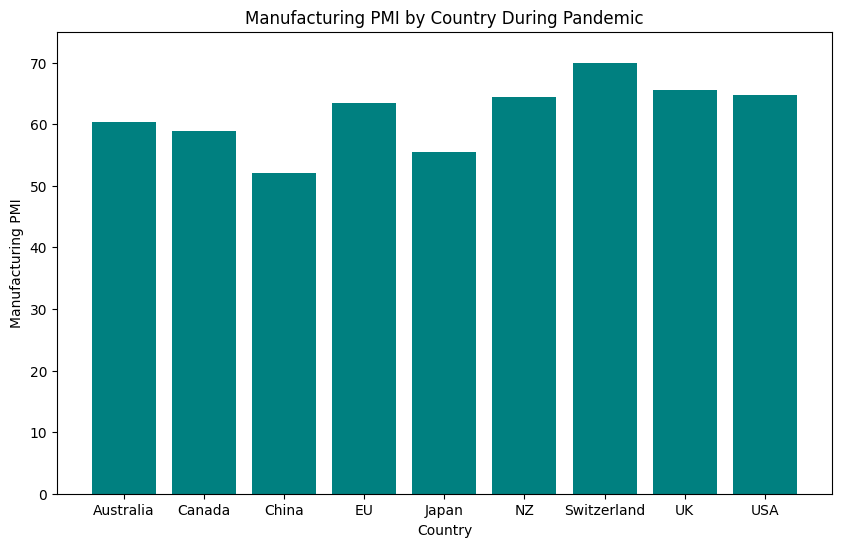

<Figure size 640x480 with 0 Axes>

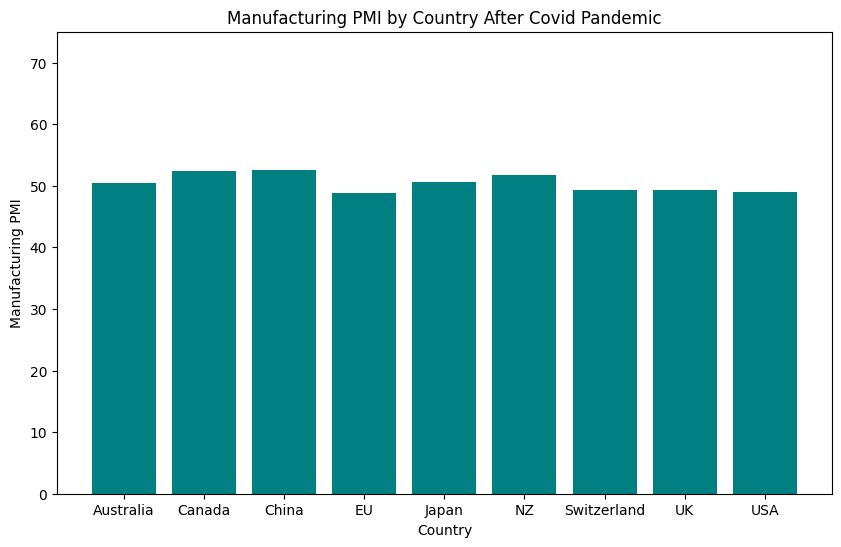

<Figure size 640x480 with 0 Axes>

In [9]:
#Data during Covid
plt.figure(figsize=(10, 6))
plt.bar(df_pandemic['country'], df_pandemic['manufacturing pmi'], color='teal')
plt.xlabel('Country', fontsize=10)
plt.ylabel('Manufacturing PMI')
plt.ylim(0, 75)
plt.title('Manufacturing PMI by Country During Pandemic')
plt.show()
plt.clf()
#Data after Covid
plt.figure(figsize=(10, 6))
plt.bar(df_after_pandemic['country'], df_after_pandemic['manufacturing pmi'], color='teal')
plt.xlabel('Country', fontsize=10)
plt.ylabel('Manufacturing PMI')
plt.ylim(0, 75)
plt.title('Manufacturing PMI by Country After Covid Pandemic')
plt.show()
plt.clf()

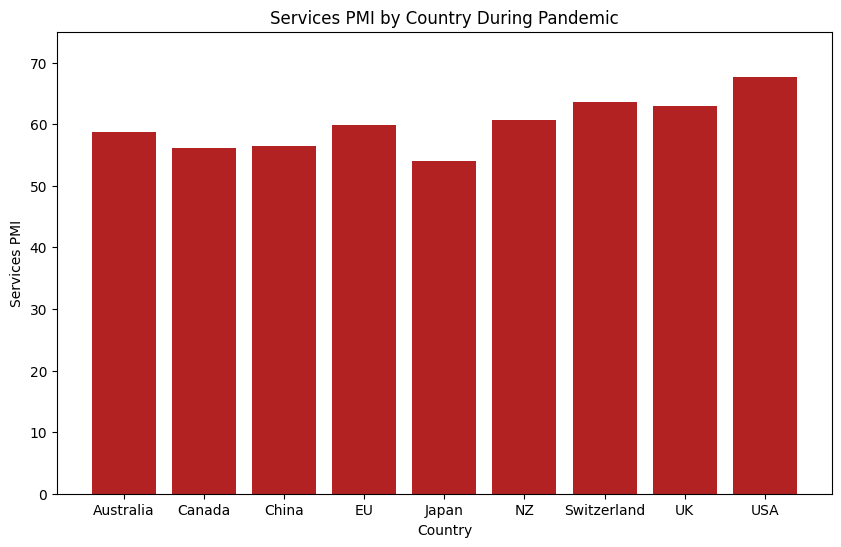

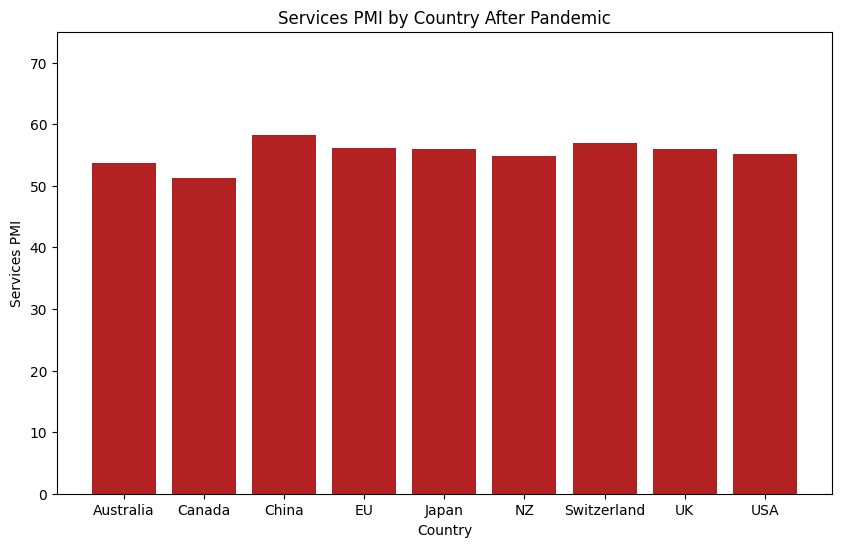

<Figure size 640x480 with 0 Axes>

In [10]:
#Data during Covid
plt.figure(figsize=(10, 6))
plt.bar(df_pandemic['country'], df_pandemic['services pmi'], color='firebrick')
plt.xlabel('Country', fontsize=10)
plt.ylabel('Services PMI')
plt.ylim(0, 75)
plt.title('Services PMI by Country During Pandemic')
plt.show()
#Data after Covid
plt.figure(figsize=(10, 6))
plt.bar(df_after_pandemic['country'], df_after_pandemic['services pmi'], color='firebrick')
plt.xlabel('Country', fontsize=10)
plt.ylabel('Services PMI')
plt.ylim(0, 75)
plt.title('Services PMI by Country After Pandemic')
plt.show()
plt.clf()

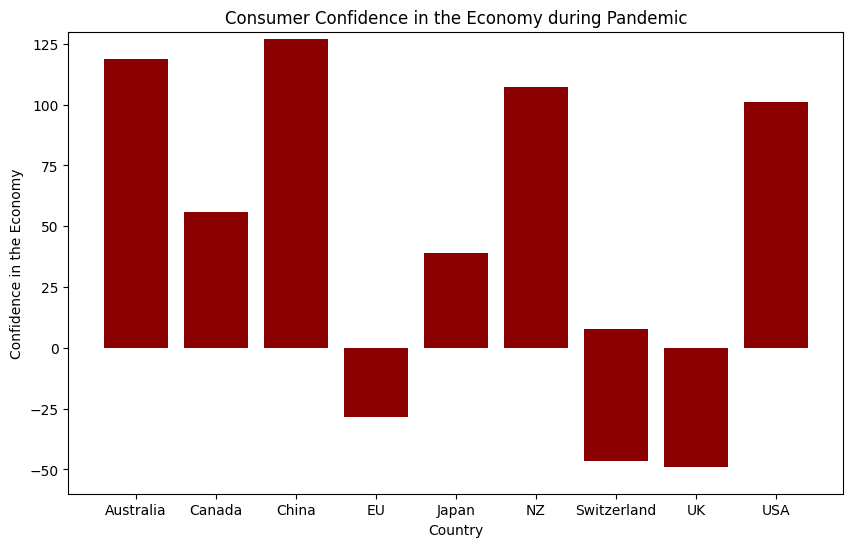

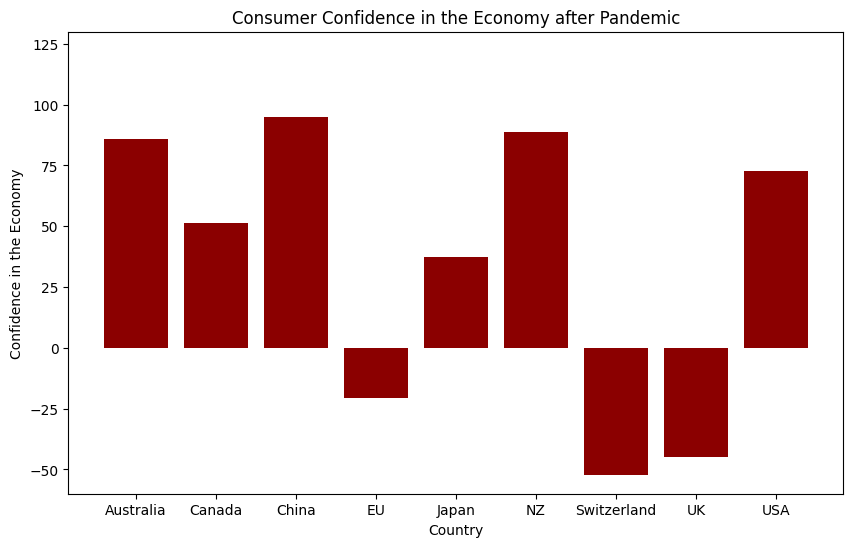

<Figure size 640x480 with 0 Axes>

In [11]:
#Data during Covid
plt.figure(figsize=(10, 6))
plt.bar(df_pandemic['country'], df_pandemic['consumer confidence'], color='darkred')
plt.xlabel('Country', fontsize=10)
plt.ylabel('Confidence in the Economy')
plt.ylim(-60, 130)
plt.title('Consumer Confidence in the Economy during Pandemic')
plt.show()
#Data after Covid
plt.figure(figsize=(10, 6))
plt.bar(df_after_pandemic['country'], df_after_pandemic['consumer confidence'], color='darkred')
plt.xlabel('Country', fontsize=10)
plt.ylabel('Confidence in the Economy')
plt.ylim(-60, 130)
plt.title('Consumer Confidence in the Economy after Pandemic')
plt.show()
plt.clf()

**Looking at Government Interest Rates and Price Changes in Basic Needs**

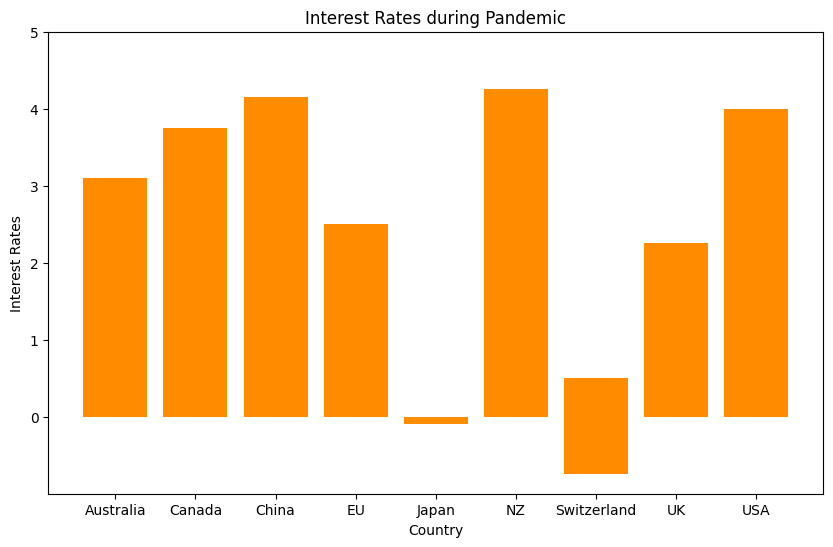

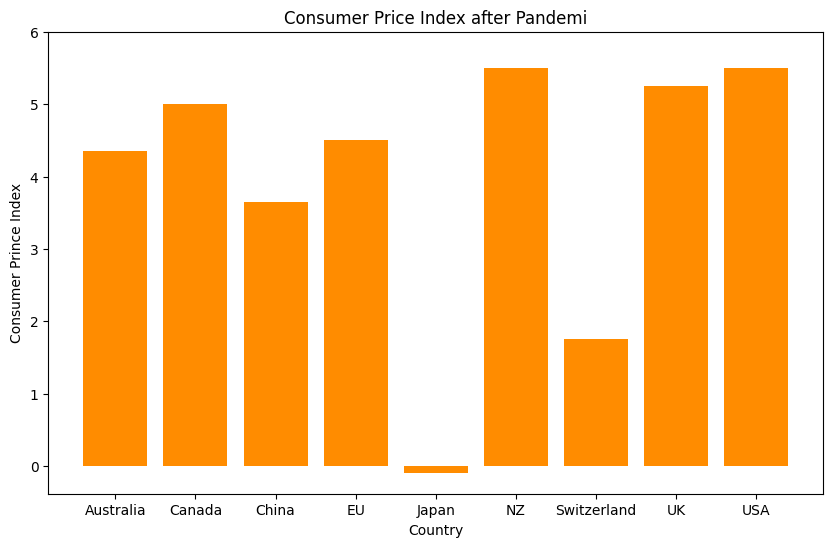

<Figure size 640x480 with 0 Axes>

In [12]:
#Data during Covid
df_pandemic.loc[:, 'interest rates'] = df_pandemic['interest rates'].str.rstrip('%').astype(float)
countries = df_pandemic['country']
interest_rates = df_pandemic['interest rates']
plt.figure(figsize=(10, 6))
plt.bar(df_pandemic['country'], df_pandemic['interest rates'], color='darkorange')
plt.xlabel('Country', fontsize=10)
plt.ylabel('Interest Rates')
plt.title('Interest Rates during Pandemic')
plt.yticks(range(int(min(interest_rates)), int(max(interest_rates)) + 2, 1))
plt.show()

#Data After Pandemic
df_after_pandemic.loc[:, 'interest rates'] = df_after_pandemic['interest rates'].str.rstrip('%').astype(float)

countries_after = df_after_pandemic['country']
interest_rates_after = df_after_pandemic['interest rates']

plt.figure(figsize=(10, 6))
plt.bar(df_after_pandemic['country'],df_after_pandemic['interest rates'], color='darkorange')
plt.xlabel('Country', fontsize=10)
plt.ylabel('Consumer Prince Index')
plt.title('Consumer Price Index after Pandemi')
plt.yticks(range(int(min(interest_rates_after)), int(max(interest_rates_after)) + 2, 1))
plt.show()
plt.clf()
plt.clf()

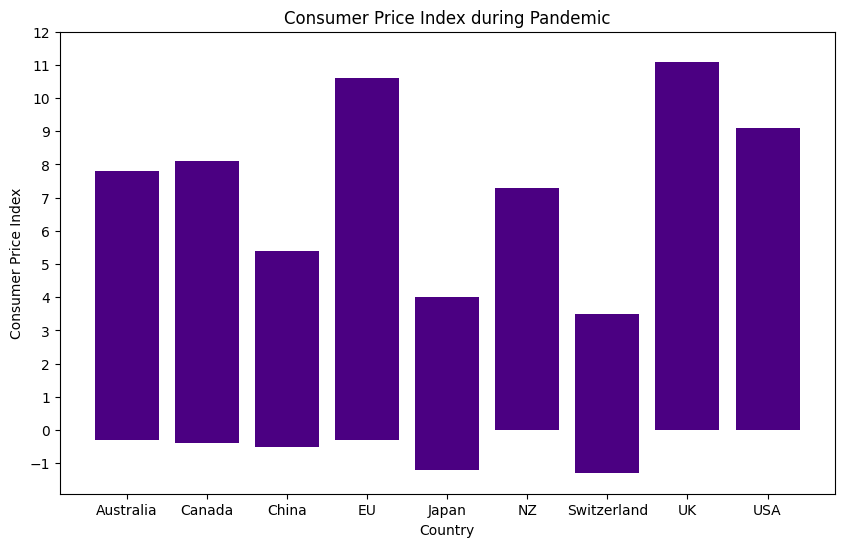

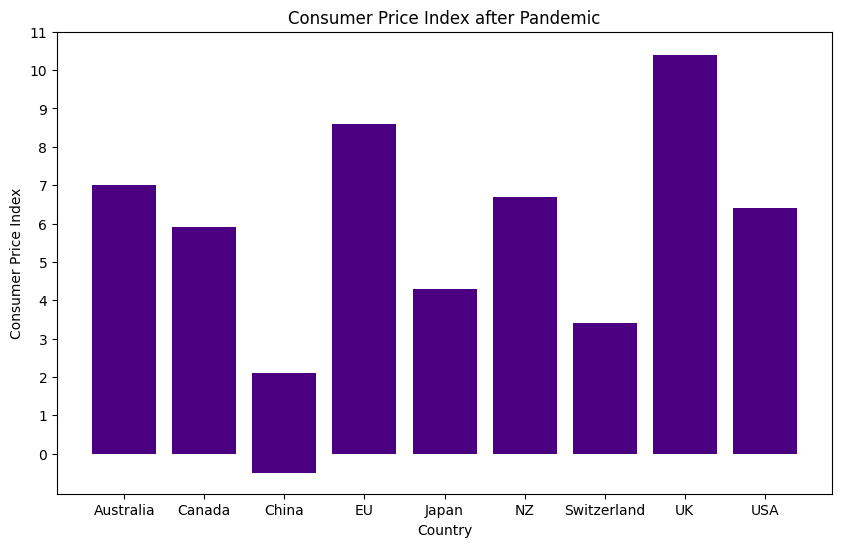

<Figure size 640x480 with 0 Axes>

In [13]:
#Data during Covid
df_pandemic.loc[:, 'cpi yoy'] = df_pandemic['cpi yoy'].str.rstrip('%').astype(float)
cpi_yoy = df_pandemic['cpi yoy']
plt.figure(figsize=(10, 6))
plt.bar(df_pandemic['country'], df_pandemic['cpi yoy'], color='indigo')
plt.xlabel('Country', fontsize=10)
plt.ylabel('Consumer Price Index')
plt.title('Consumer Price Index during Pandemic')
plt.yticks(range(int(min(cpi_yoy)), int(max(cpi_yoy)) + 2, 1))
plt.show()
#Data after Covid
df_after_pandemic.loc[:, 'cpi yoy'] = df_after_pandemic['cpi yoy'].str.rstrip('%').astype(float)
cpi_yoy_after = df_after_pandemic['cpi yoy']
plt.figure(figsize=(10, 6))
plt.bar(df_after_pandemic['country'], df_after_pandemic['cpi yoy'], color='indigo')
plt.xlabel('Country', fontsize=10)
plt.ylabel('Consumer Price Index')
plt.title('Consumer Price Index after Pandemic')
plt.yticks(range(int(min(cpi_yoy_after)), int(max(cpi_yoy_after)) + 2, 1))
plt.show()
plt.clf()

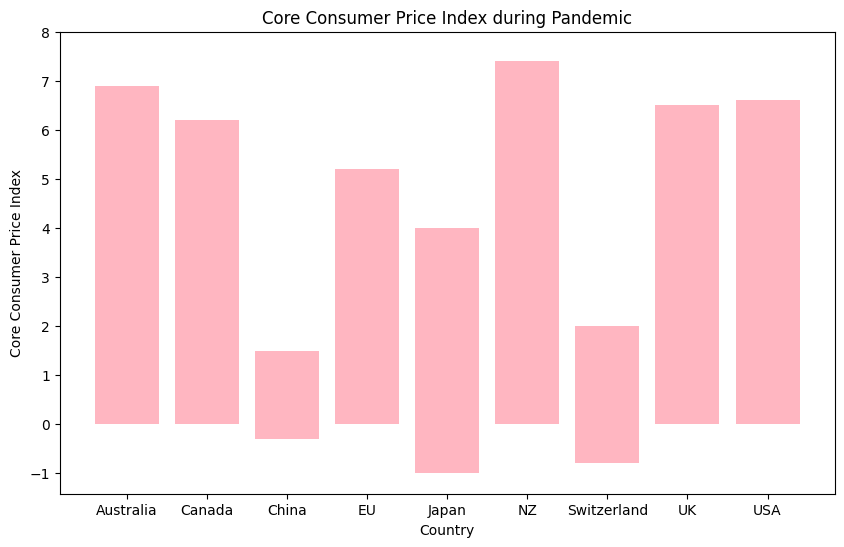

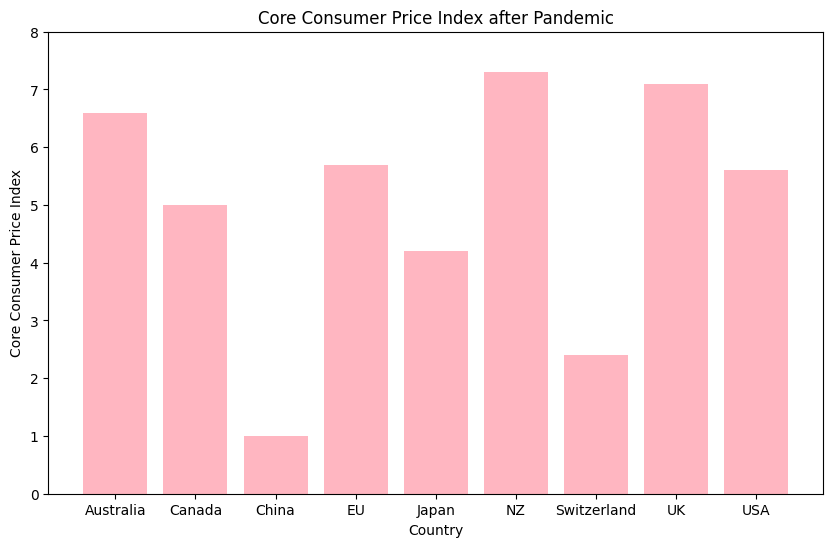

<Figure size 640x480 with 0 Axes>

In [14]:
#Data during Covid
df_pandemic.loc[:, 'core cpi'] = df_pandemic['core cpi'].str.rstrip('%').astype(float)
core_cpi = df_pandemic['core cpi']
plt.figure(figsize=(10, 6))
plt.bar(df_pandemic['country'], df_pandemic['core cpi'], color='lightpink')
plt.xlabel('Country', fontsize=10)
plt.ylabel('Core Consumer Price Index')
plt.title('Core Consumer Price Index during Pandemic')
plt.yticks(range(int(min(core_cpi)), int(max(core_cpi)) + 2, 1))
plt.show()
#Data after Covid
df_after_pandemic.loc[:, 'core cpi'] = df_after_pandemic['core cpi'].str.rstrip('%').astype(float)
core_cpi_after = df_after_pandemic['core cpi']
plt.figure(figsize=(10, 6))
plt.bar(df_after_pandemic['country'], df_after_pandemic['core cpi'], color='lightpink')
plt.xlabel('Country', fontsize=10)
plt.ylabel('Core Consumer Price Index')
plt.title('Core Consumer Price Index after Pandemic')
plt.yticks(range(int(min(core_cpi_after)), int(max(core_cpi_after)) + 2, 1))
plt.show()
plt.clf()

# **More Specific Economic Data**

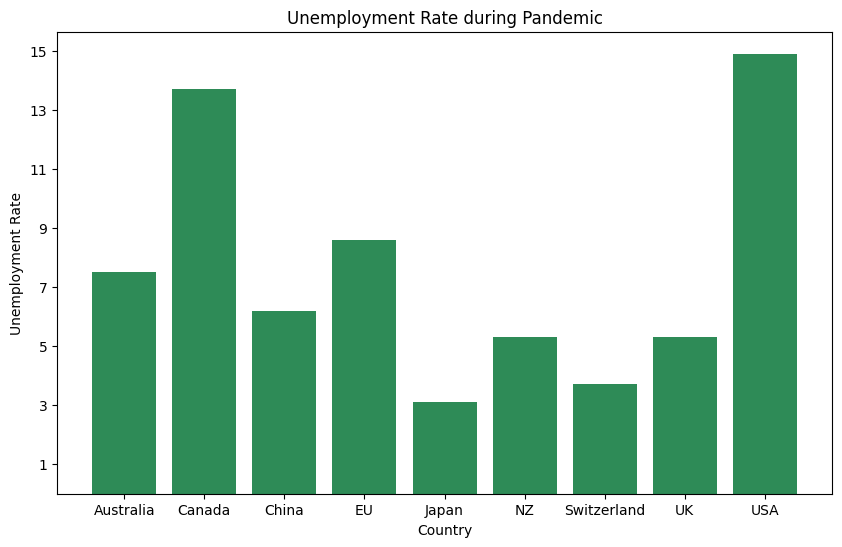

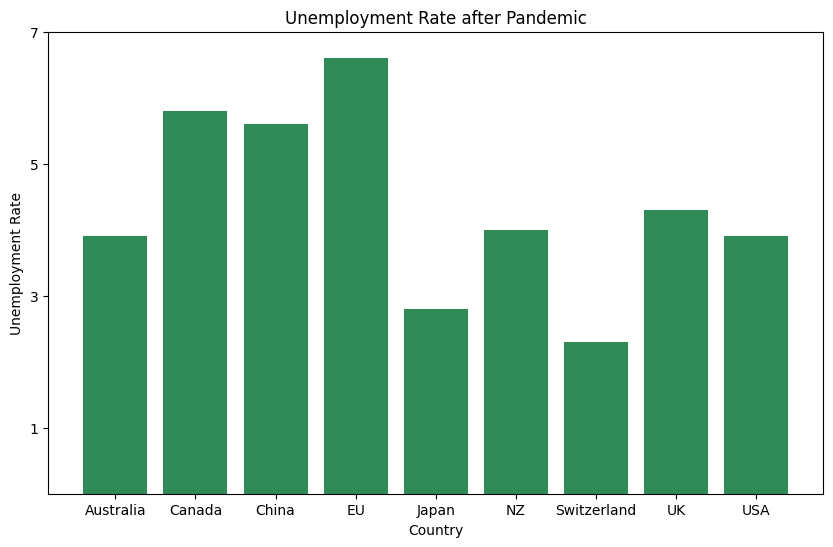

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(10, 6))
df_pandemic.loc[:, 'unemployment rate'] = df_pandemic['unemployment rate'].str.rstrip('%').astype('float')
plt.bar(df_pandemic['country'], df_pandemic['unemployment rate'], color='seagreen')
plt.xlabel('Country', fontsize=10)
plt.ylabel('Unemployment Rate')
yticks = np.arange(np.floor(df_pandemic['unemployment rate'].min()), 
                   np.ceil(df_pandemic['unemployment rate'].max()) + 1, 2)
plt.yticks(yticks)
plt.title('Unemployment Rate during Pandemic')
plt.show()
df_after_pandemic.loc[:, 'unemployment rate'] = df_after_pandemic['unemployment rate'].str.rstrip('%').astype('float')
plt.figure(figsize=(10, 6))
plt.bar(df_after_pandemic['country'], df_after_pandemic['unemployment rate'], color='seagreen')
plt.xlabel('Country', fontsize=10)
plt.ylabel('Unemployment Rate')
yticks_after = yticks = np.arange(np.floor(df_after_pandemic['unemployment rate'].min()), 
                   np.ceil(df_after_pandemic['unemployment rate'].max()) + 1, 2)
plt.yticks(yticks_after)
plt.title('Unemployment Rate after Pandemic')
plt.show()
plt.clf()

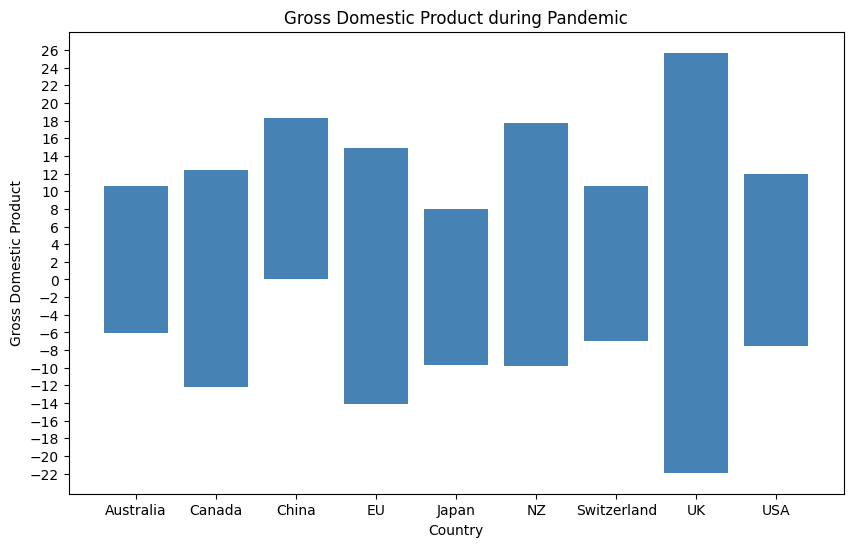

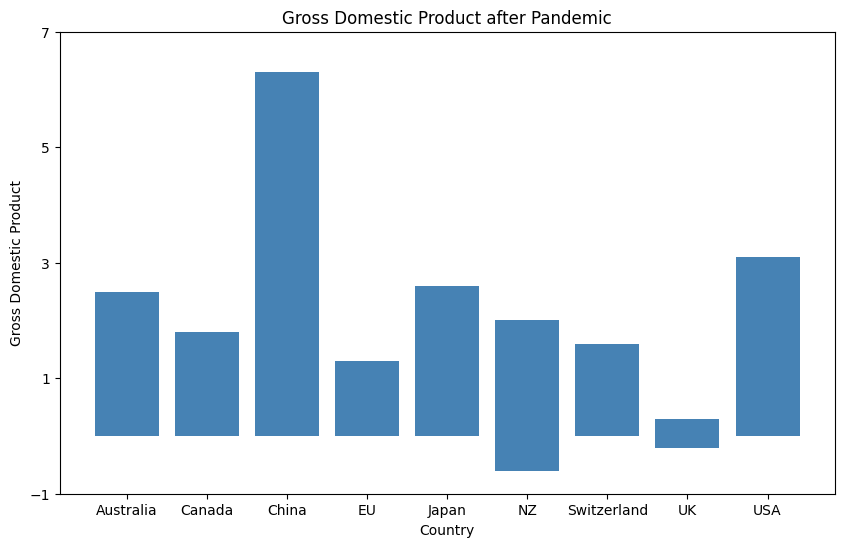

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(10, 6))
df_pandemic.loc[:, 'gdp yoy'] = df_pandemic['gdp yoy'].str.rstrip('%').astype('float')
plt.bar(df_pandemic['country'], df_pandemic['gdp yoy'], color='steelblue')
plt.xlabel('Country', fontsize=10)
plt.ylabel('Gross Domestic Product')
yticks = np.arange(np.floor(df_pandemic['gdp yoy'].min()), 
                   np.ceil(df_pandemic['gdp yoy'].max()) + 1, 2)
plt.yticks(yticks)
plt.title('Gross Domestic Product during Pandemic')
plt.show()
df_after_pandemic.loc[:, 'gdp yoy'] = df_after_pandemic['gdp yoy'].str.rstrip('%').astype('float')
plt.figure(figsize=(10, 6))
plt.bar(df_after_pandemic['country'], df_after_pandemic['gdp yoy'], color='steelblue')
plt.xlabel('Country', fontsize=10)
plt.ylabel('Gross Domestic Product')
yticks_after = yticks = np.arange(np.floor(df_after_pandemic['gdp yoy'].min()), 
                   np.ceil(df_after_pandemic['gdp yoy'].max()) + 1, 2)
plt.yticks(yticks_after)
plt.title('Gross Domestic Product after Pandemic')
plt.show()
plt.clf()

**Currency Power During and After Covid**

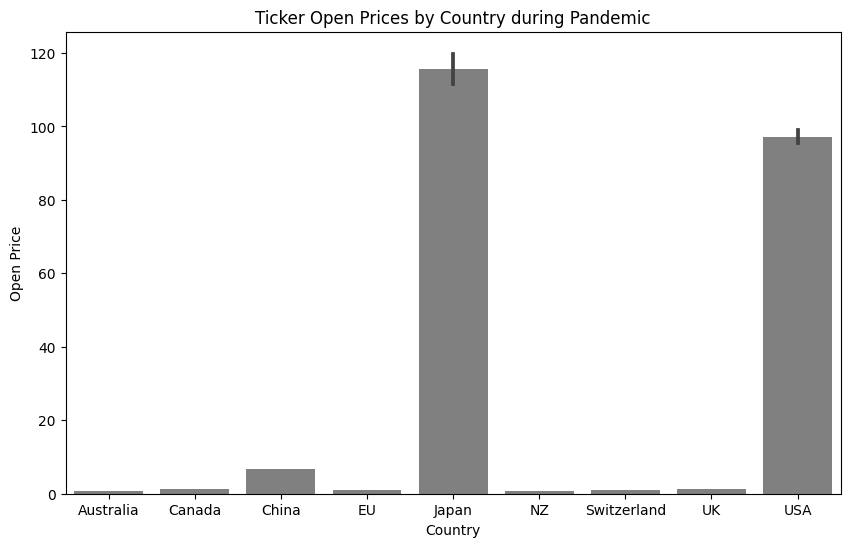

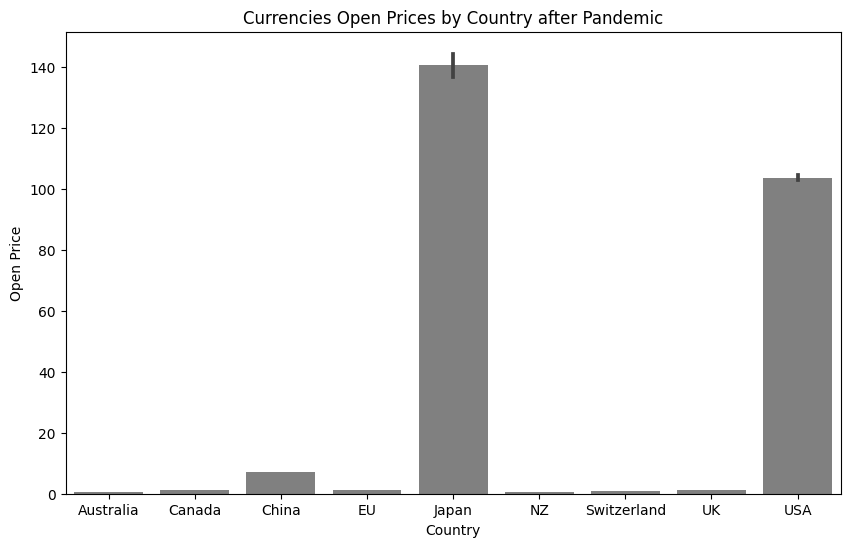

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='open', data=df_pandemic, color='grey')
plt.title('Ticker Open Prices by Country during Pandemic')
plt.xlabel('Country')
plt.ylabel('Open Price')
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='open', data=df_after_pandemic, color='grey')
plt.title('Currencies Open Prices by Country after Pandemic')
plt.xlabel('Country')
plt.ylabel('Open Price')
plt.show()

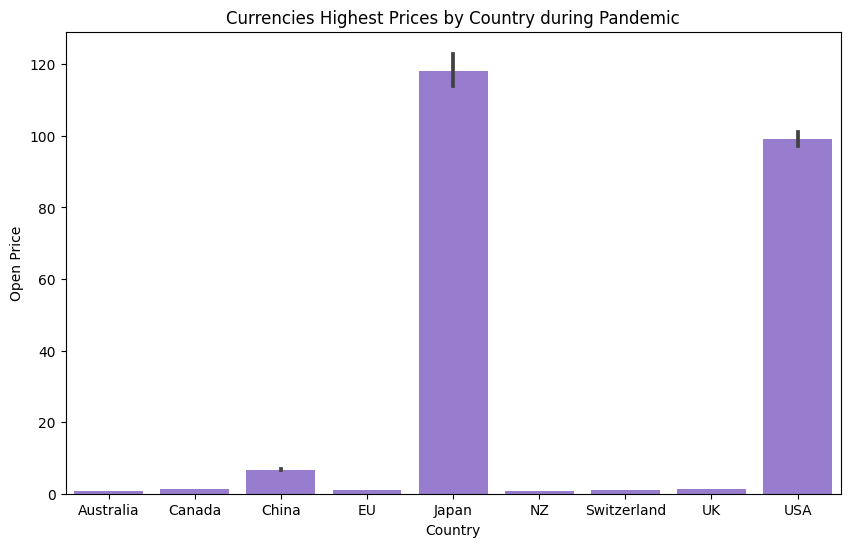

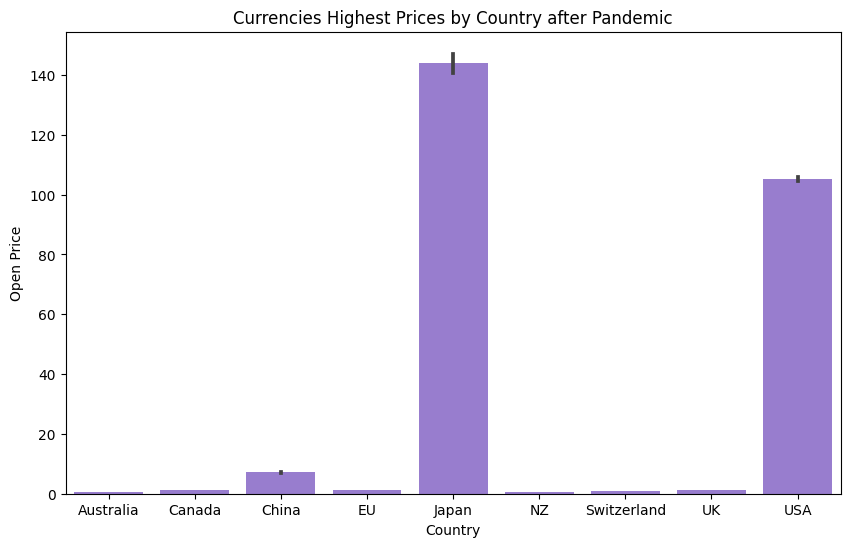

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='high', data=df_pandemic, color='mediumpurple')
plt.title('Currencies Highest Prices by Country during Pandemic')
plt.xlabel('Country')
plt.ylabel('Open Price')
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='high', data=df_after_pandemic, color='mediumpurple')
plt.title('Currencies Highest Prices by Country after Pandemic')
plt.xlabel('Country')
plt.ylabel('Open Price')
plt.show()

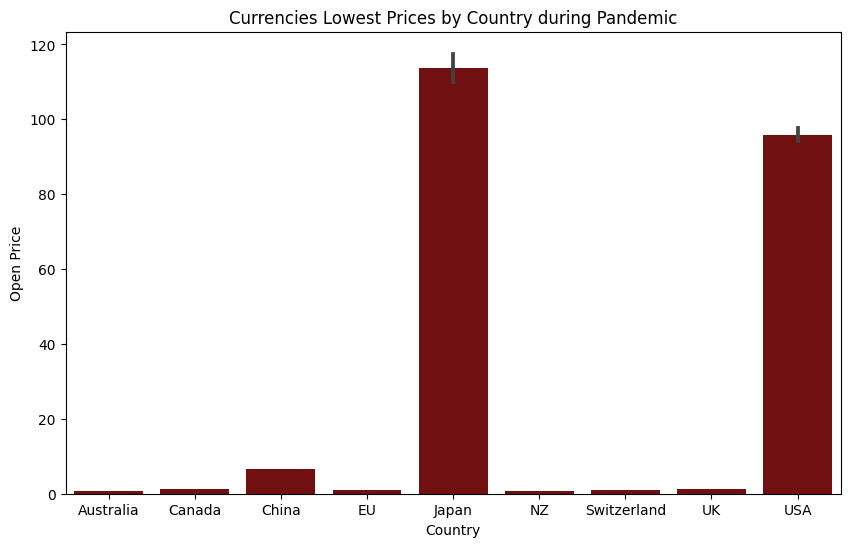

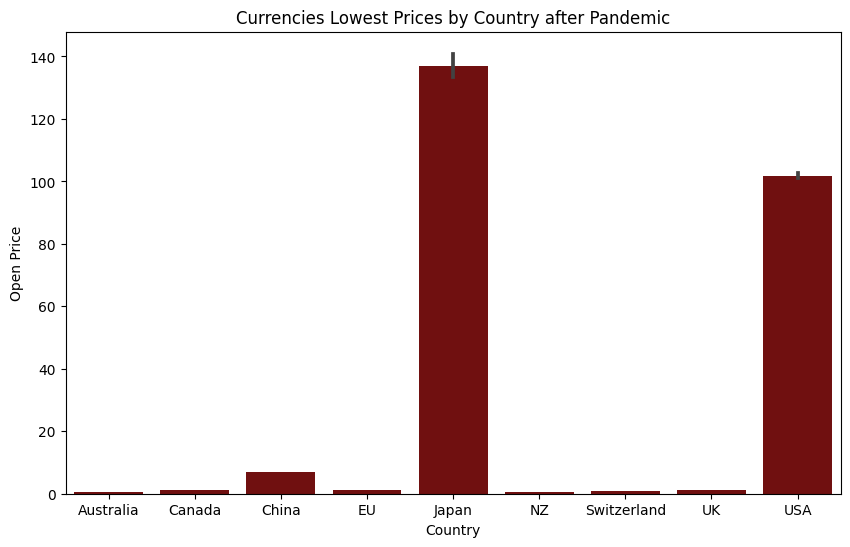

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='low', data=df_pandemic, color='maroon')
plt.title('Currencies Lowest Prices by Country during Pandemic')
plt.xlabel('Country')
plt.ylabel('Open Price')
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='low', data=df_after_pandemic, color='maroon')
plt.title('Currencies Lowest Prices by Country after Pandemic')
plt.xlabel('Country')
plt.ylabel('Open Price')
plt.show()

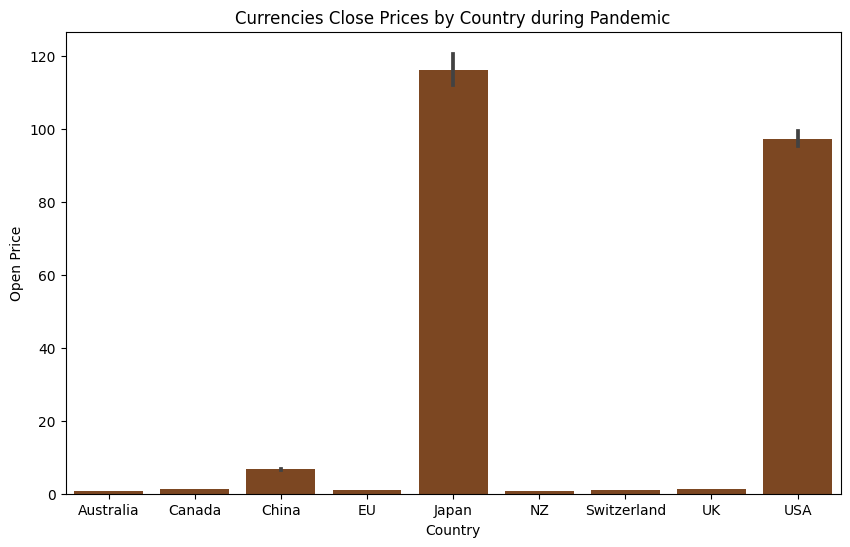

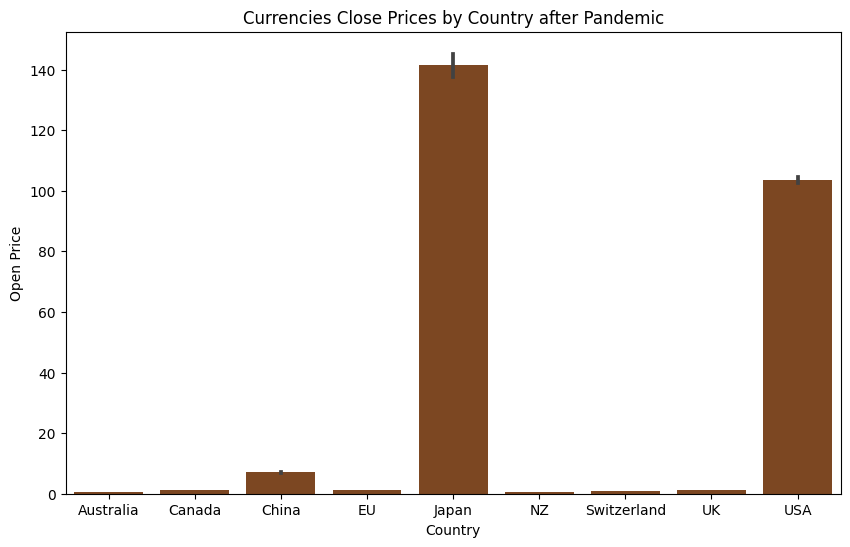

<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='close', data=df_pandemic, color='saddlebrown')
plt.title('Currencies Close Prices by Country during Pandemic')
plt.xlabel('Country')
plt.ylabel('Open Price')
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='close', data=df_after_pandemic, color='saddlebrown')
plt.title('Currencies Close Prices by Country after Pandemic')
plt.xlabel('Country')
plt.ylabel('Open Price')
plt.show()
plt.clf()

# **Step 1: Exploring the dataset**

In [21]:
import pandas as pd

file_path = '/kaggle/input/economic-data-life-after-covid/economic data.csv'  
data = pd.read_csv(file_path)

print("First 5 rows of the dataset:")
print(data.head())

print("\nDataset Summary:")
print(data.describe()) 

print("\nMissing values in each column:")
print(data.isnull().sum())

print("\nData types of each column:")
print(data.dtypes)

print("\nUnique values in each column:")
print(data.nunique())


First 5 rows of the dataset:
     country        date  manufacturing pmi  services pmi  \
0  australia  2020-01-01               49.6          50.6   
1  australia  2020-02-01               50.2          49.0   
2  australia  2020-03-01               49.7          38.5   
3  australia  2020-04-01               44.1          19.5   
4  australia  2020-05-01               44.0          26.9   

   consumer confidence interest rates cpi yoy core cpi unemployment rate  \
0                 93.4          0.75%   2.20%    1.70%             5.20%   
1                 95.5          0.75%   2.20%    1.70%             5.10%   
2                 91.9          0.50%   2.20%    1.70%             5.20%   
3                 75.6          0.25%  -0.30%    1.20%             6.30%   
4                 88.1          0.25%  -0.30%    1.20%             7.00%   

  gdp yoy  ticker    open    high     low   close  
0   1.20%  audusd  0.7021  0.7031  0.6682  0.6691  
1   1.20%  audusd  0.6690  0.6776  0.6434  

**Step 2: Cleaning the dataset**

In [22]:
def convert_percentage_column(column):
    return column.replace('%', '').astype(float)

percentage_columns = ['interest rates', 'cpi yoy', 'core cpi', 'unemployment rate', 'gdp yoy']

for col in percentage_columns:
    data[col] = data[col].str.replace('%', '').astype(float)

data = pd.get_dummies(data, columns=['country', 'ticker'])

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_columns = ['manufacturing pmi', 'services pmi', 'consumer confidence', 'open', 'high', 'low', 'close']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("\nMissing values after cleaning:")
print(data.isnull().sum())



Missing values after cleaning:
date                      0
manufacturing pmi         0
services pmi              0
consumer confidence       0
interest rates            0
cpi yoy                   0
core cpi                  0
unemployment rate         0
gdp yoy                   0
open                      0
high                      0
low                       0
close                     0
country_australia         0
country_canada            0
country_china             0
country_europe            0
country_japan             0
country_new zealand       0
country_switzerland       0
country_united kingdom    0
country_united states     0
ticker_audusd             0
ticker_dxy                0
ticker_eurusd             0
ticker_gbpusd             0
ticker_nzdusd             0
ticker_usdcad             0
ticker_usdchf             0
ticker_usdcny             0
ticker_usdjpy             0
dtype: int64


In [23]:
print("\nData types after cleaning:")
print(data.dtypes)



Data types after cleaning:
date                       object
manufacturing pmi         float64
services pmi              float64
consumer confidence       float64
interest rates            float64
cpi yoy                   float64
core cpi                  float64
unemployment rate         float64
gdp yoy                   float64
open                      float64
high                      float64
low                       float64
close                     float64
country_australia            bool
country_canada               bool
country_china                bool
country_europe               bool
country_japan                bool
country_new zealand          bool
country_switzerland          bool
country_united kingdom       bool
country_united states        bool
ticker_audusd                bool
ticker_dxy                   bool
ticker_eurusd                bool
ticker_gbpusd                bool
ticker_nzdusd                bool
ticker_usdcad                bool
ticker_usdchf       

In [24]:
print("\nSummary of normalized columns:")
print(data[['open', 'high', 'low', 'close']].describe())



Summary of normalized columns:
             open        high         low       close
count  432.000000  432.000000  432.000000  432.000000
mean     0.167878    0.170971    0.169896    0.168494
std      0.303405    0.309570    0.306664    0.304673
min      0.000000    0.000000    0.000000    0.000000
25%      0.002322    0.002208    0.002349    0.002312
50%      0.004620    0.004583    0.004654    0.004617
75%      0.043031    0.043230    0.043809    0.043168
max      1.000000    1.000000    1.000000    1.000000


In [25]:
print("\nFirst few rows after cleaning:")
print(data.head())



First few rows after cleaning:
         date  manufacturing pmi  services pmi  consumer confidence  \
0  2020-01-01           0.536364      0.694245             0.812813   
1  2020-02-01           0.550000      0.665468             0.824513   
2  2020-03-01           0.538636      0.476619             0.804457   
3  2020-04-01           0.411364      0.134892             0.713649   
4  2020-05-01           0.409091      0.267986             0.783287   

   interest rates  cpi yoy  core cpi  unemployment rate  gdp yoy      open  \
0            0.75      2.2       1.7                5.2      1.2  0.000945   
1            0.75      2.2       1.7                5.1      1.2  0.000726   
2            0.50      2.2       1.7                5.2      1.2  0.000592   
3            0.25     -0.3       1.2                6.3     -6.1  0.000357   
4            0.25     -0.3       1.2                7.0     -6.1  0.000607   

   ...  country_united states  ticker_audusd  ticker_dxy  ticker_eurusd 

In [26]:
data.to_csv('cleaned_economic_data.csv', index=False)

**Outlier Detection**

In [27]:
import numpy as np
from scipy import stats

# Select numerical columns for outlier detection
numerical_cols = ['manufacturing pmi', 'services pmi', 'consumer confidence', 'interest rates', 
                  'cpi yoy', 'core cpi', 'unemployment rate', 'gdp yoy', 
                  'open', 'high', 'low', 'close']

z_scores = np.abs(stats.zscore(data[numerical_cols]))
threshold = 3
outliers = (z_scores > threshold).all(axis=1)

outliers_data = data[outliers]
print("Outliers Detected:\n", outliers_data)

cleaned_data_no_outliers = data[~outliers]
print("\nNumber of outliers removed:", len(outliers_data))

cleaned_data_no_outliers.to_csv('cleaned_economic_data_no_outliers.csv', index=False)


Outliers Detected:
 Empty DataFrame
Columns: [date, manufacturing pmi, services pmi, consumer confidence, interest rates, cpi yoy, core cpi, unemployment rate, gdp yoy, open, high, low, close, country_australia, country_canada, country_china, country_europe, country_japan, country_new zealand, country_switzerland, country_united kingdom, country_united states, ticker_audusd, ticker_dxy, ticker_eurusd, ticker_gbpusd, ticker_nzdusd, ticker_usdcad, ticker_usdchf, ticker_usdcny, ticker_usdjpy]
Index: []

[0 rows x 31 columns]

Number of outliers removed: 0


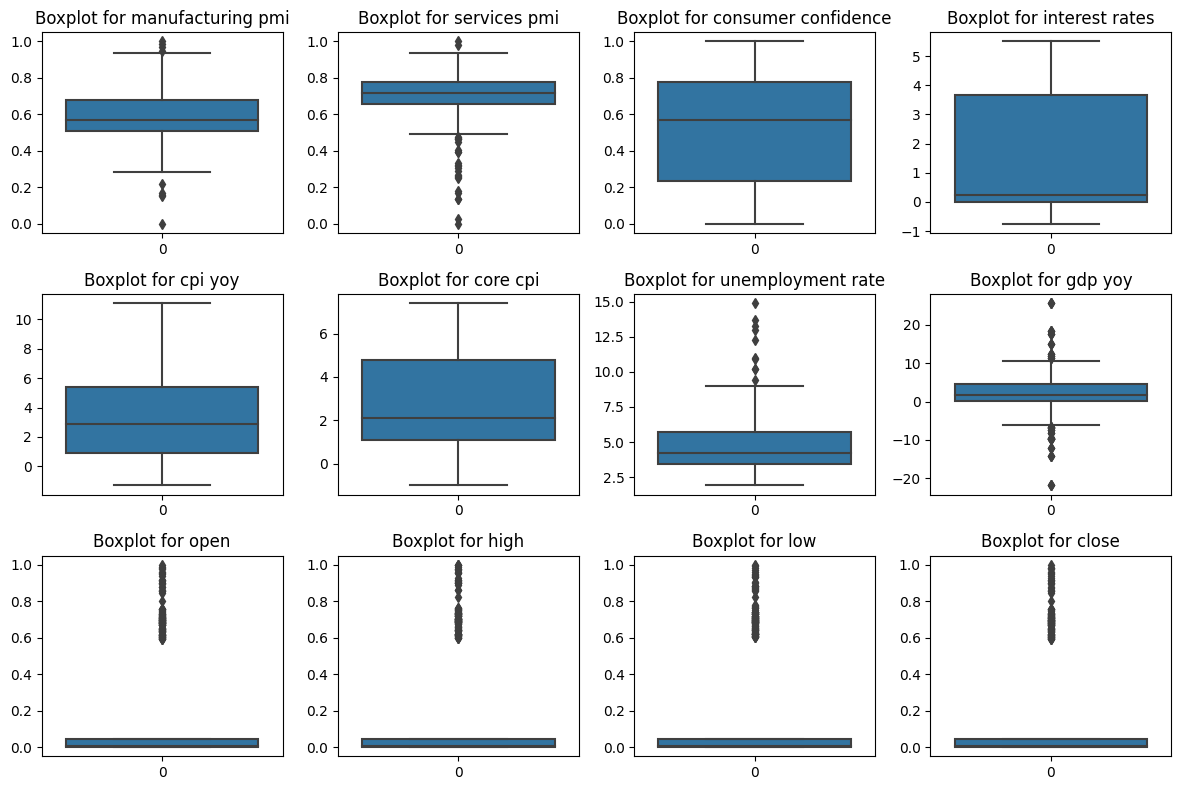

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data[col])
    plt.title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()


**Feature Selection**

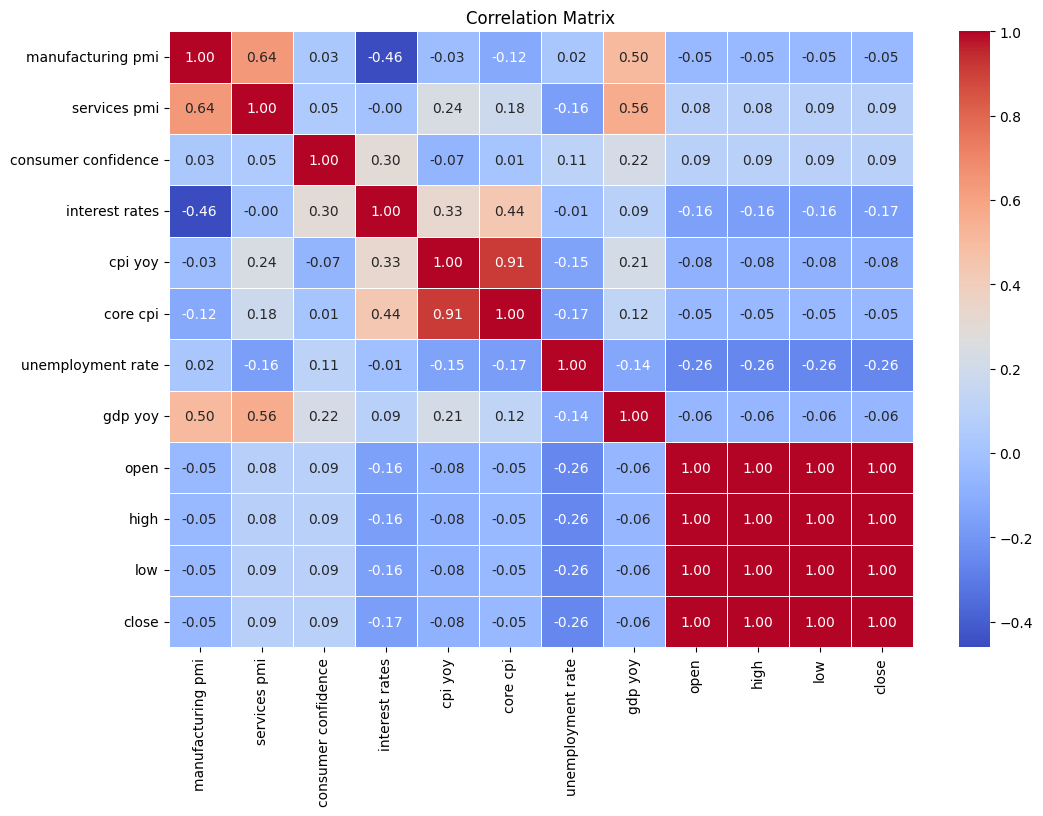

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = data.select_dtypes(include=['float64']).columns
correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


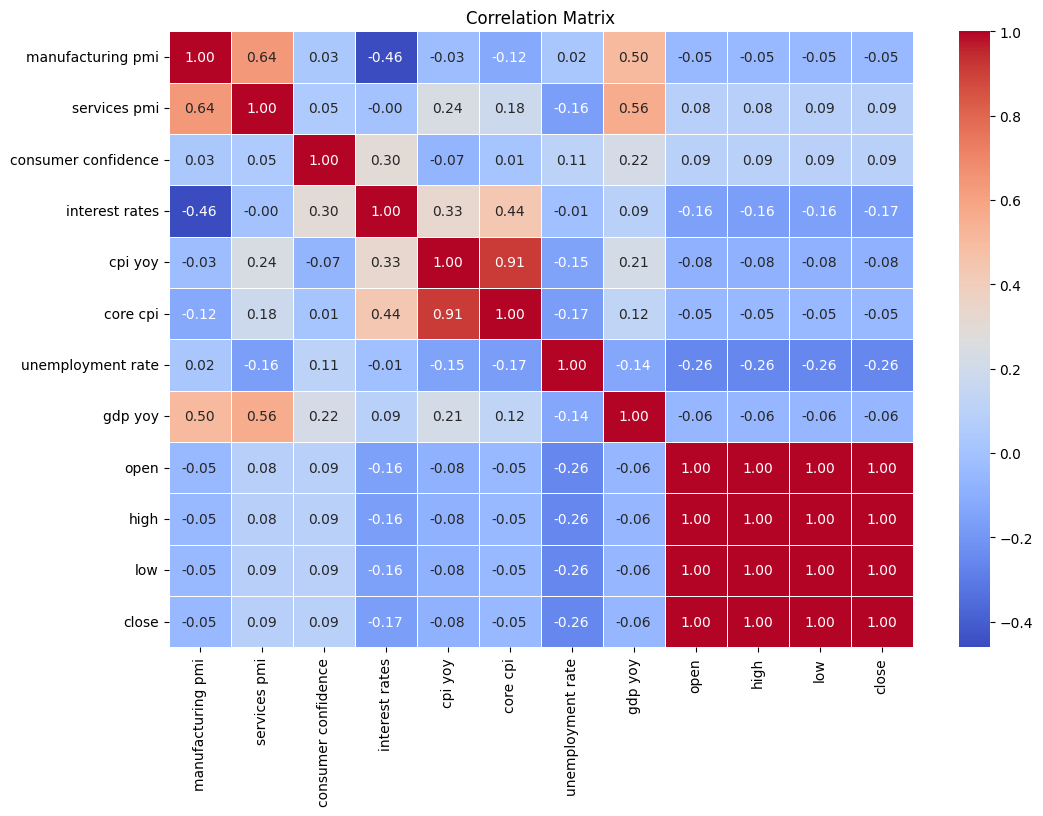

Correlation Matrix Report (Threshold: 0.85):

Highly Correlated Features (Correlation > {threshold}):
- core cpi and cpi yoy: Correlation = 0.91
- cpi yoy and core cpi: Correlation = 0.91
- high and open: Correlation = 1.00
- low and open: Correlation = 1.00
- close and open: Correlation = 1.00
- open and high: Correlation = 1.00
- low and high: Correlation = 1.00
- close and high: Correlation = 1.00
- open and low: Correlation = 1.00
- high and low: Correlation = 1.00
- close and low: Correlation = 1.00
- open and close: Correlation = 1.00
- high and close: Correlation = 1.00
- low and close: Correlation = 1.00

Correlation Matrix (as a table):
                     manufacturing pmi  services pmi  consumer confidence  interest rates   cpi yoy  core cpi  unemployment rate   gdp yoy      open      high       low     close
manufacturing pmi             1.000000      0.639538             0.032654       -0.461443 -0.027620 -0.122957           0.024807  0.503018 -0.048433 -0.048209 -0.04677

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def correlation_report(data, threshold=0.85):
    numerical_columns = data.select_dtypes(include=['float64']).columns
    correlation_matrix = data[numerical_columns].corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

    correlated_features = []

    for column in correlation_matrix.columns:
        for row in correlation_matrix.index:
            if abs(correlation_matrix.loc[row, column]) > threshold and row != column:
                correlated_features.append((row, column, correlation_matrix.loc[row, column]))

    report = f"Correlation Matrix Report (Threshold: {threshold}):\n\n"
    report += "Highly Correlated Features (Correlation > {threshold}):\n"

    if correlated_features:
        for feature1, feature2, corr_value in correlated_features:
            report += f"- {feature1} and {feature2}: Correlation = {corr_value:.2f}\n"
    else:
        report += "No pairs found with correlation above the threshold.\n"

    correlation_df = pd.DataFrame(correlation_matrix)
    report += "\nCorrelation Matrix (as a table):\n"
    report += correlation_df.to_string()
    return report

report = correlation_report(data)
print(report)


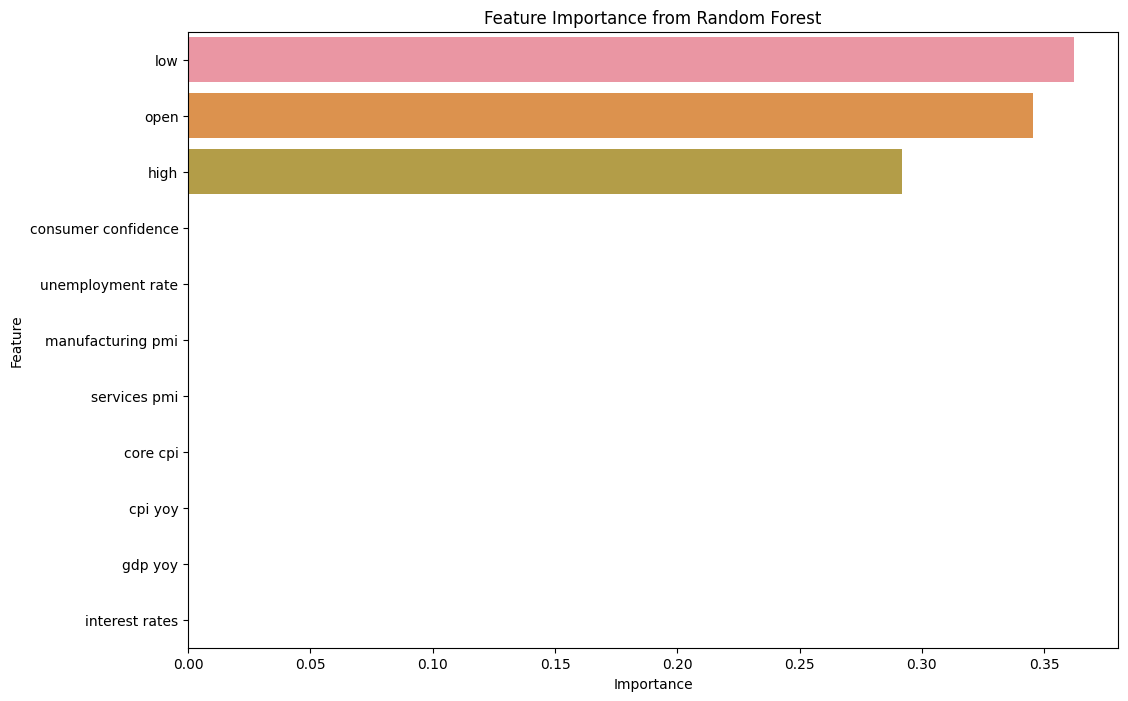

                Feature  Importance
10                  low    0.362143
8                  open    0.345617
9                  high    0.291696
2   consumer confidence    0.000262
6     unemployment rate    0.000083
0     manufacturing pmi    0.000057
1          services pmi    0.000054
5              core cpi    0.000036
4               cpi yoy    0.000034
7               gdp yoy    0.000017
3        interest rates    0.000003


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = data[numerical_columns].drop(columns=['close']) 
y = data['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

print(feature_importance_df)


In [32]:
importance_threshold = 0.0001  

selected_features = feature_importance_df[feature_importance_df['Importance'] > importance_threshold]
selected_columns = selected_features['Feature'].tolist()
data_selected = data[selected_columns + ['close']]
print(data_selected.head())

data_selected.to_csv('selected_features_data.csv', index=False)


        low      open      high  consumer confidence     close
0  0.000825  0.000945  0.000764             0.812813  0.000726
1  0.000657  0.000726  0.000596             0.824513  0.000606
2  0.000025  0.000592  0.000536             0.804457  0.000358
3  0.000347  0.000357  0.000460             0.713649  0.000606
4  0.000614  0.000607  0.000535             0.783287  0.000709


**Multi-Collinearity Check (VIF - Variance Inflation Factor)**

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


X_selected = add_constant(data_selected.drop(columns=['close']))

vif_data = pd.DataFrame()
vif_data["Feature"] = X_selected.columns
vif_data["VIF"] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]

print(vif_data)


               Feature          VIF
0                const     4.528686
1                  low  3309.318579
2                 open  3310.769527
3                 high  2931.631399
4  consumer confidence     1.015026


In [34]:
# Drop highly correlated features
columns_to_drop = ['low', 'open', 'high']
data_cleaned_final = data_selected.drop(columns=columns_to_drop)

# Confirm the cleaned dataset by checking the first few rows
print(data_cleaned_final.head())

# Save the final cleaned dataset to a new CSV file
data_cleaned_final.to_csv('final_cleaned_data.csv', index=False)


   consumer confidence     close
0             0.812813  0.000726
1             0.824513  0.000606
2             0.804457  0.000358
3             0.713649  0.000606
4             0.783287  0.000709


In [35]:
# Confirm the first few rows
print(data_cleaned_final.head())


   consumer confidence     close
0             0.812813  0.000726
1             0.824513  0.000606
2             0.804457  0.000358
3             0.713649  0.000606
4             0.783287  0.000709


**Interactive Demonstration**

Mean Absolute Error: 0.0015215099130177951
Root Mean Squared Error: 0.0037375423814875546
R-squared: 0.999805599550523


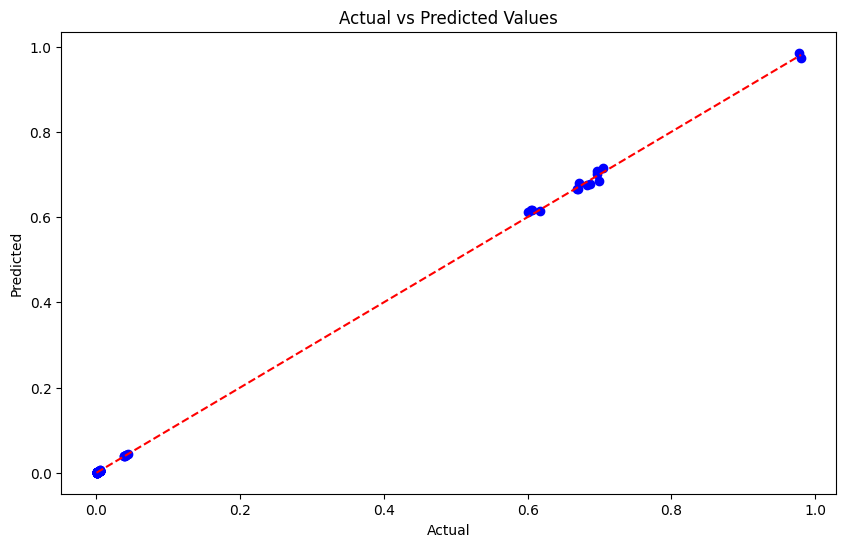

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv('/kaggle/input/selected-features-data/selected_features_data.csv')

X = data[['low', 'open', 'high', 'consumer confidence']]  
y = data['close']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


**Other Algo's**

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

data = pd.read_csv('/kaggle/input/selected-features-data/selected_features_data.csv')

X = data.drop(['close'], axis=1)  
y = data['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "J48 (Decision Tree)": DecisionTreeRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42),
    "MLP": MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    "SVM": SVR(kernel='rbf')
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name}:")
    print(f"  Mean Absolute Error: {mae}")
    print(f"  Mean Squared Error: {mse}")
    print(f"  Root Mean Squared Error: {rmse}")
    print(f"  R-squared: {r2}")
    print("="*50)


Random Forest:
  Mean Absolute Error: 0.0015215099130177951
  Mean Squared Error: 1.3969223053415662e-05
  Root Mean Squared Error: 0.0037375423814875546
  R-squared: 0.999805599550523
J48 (Decision Tree):
  Mean Absolute Error: 0.0021557248370611885
  Mean Squared Error: 3.1334903353899105e-05
  Root Mean Squared Error: 0.005597758779538388
  R-squared: 0.9995639328491623
AdaBoost:
  Mean Absolute Error: 0.0035037398108170637
  Mean Squared Error: 7.129386739043283e-05
  Root Mean Squared Error: 0.008443569588179684
  R-squared: 0.9990078503426667
MLP:
  Mean Absolute Error: 0.022028793018931507
  Mean Squared Error: 0.000640810547194622
  Root Mean Squared Error: 0.025314236057890863
  R-squared: 0.9910822629198539
SVM:
  Mean Absolute Error: 0.07429098883798062
  Mean Squared Error: 0.0057992496982632626
  Root Mean Squared Error: 0.07615280492708895
  R-squared: 0.9192956728043347


Model Performance Metrics:

Linear Regression:
  Mean Absolute Error (MAE): 0.0010
  Mean Squared Error (MSE): 0.0000
  Root Mean Squared Error (RMSE): 0.0762
  R-squared (R²): 0.9999
--------------------------------------------------
SVR:
  Mean Absolute Error (MAE): 0.0743
  Mean Squared Error (MSE): 0.0058
  Root Mean Squared Error (RMSE): 0.0762
  R-squared (R²): 0.9193
--------------------------------------------------
KNN:
  Mean Absolute Error (MAE): 0.0021
  Mean Squared Error (MSE): 0.0000
  Root Mean Squared Error (RMSE): 0.0762
  R-squared (R²): 0.9997
--------------------------------------------------
Decision Tree:
  Mean Absolute Error (MAE): 0.0022
  Mean Squared Error (MSE): 0.0000
  Root Mean Squared Error (RMSE): 0.0762
  R-squared (R²): 0.9996
--------------------------------------------------
Gradient Boosting:
  Mean Absolute Error (MAE): 0.0019
  Mean Squared Error (MSE): 0.0000
  Root Mean Squared Error (RMSE): 0.0762
  R-squared (R²): 0.9997
--------------------

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


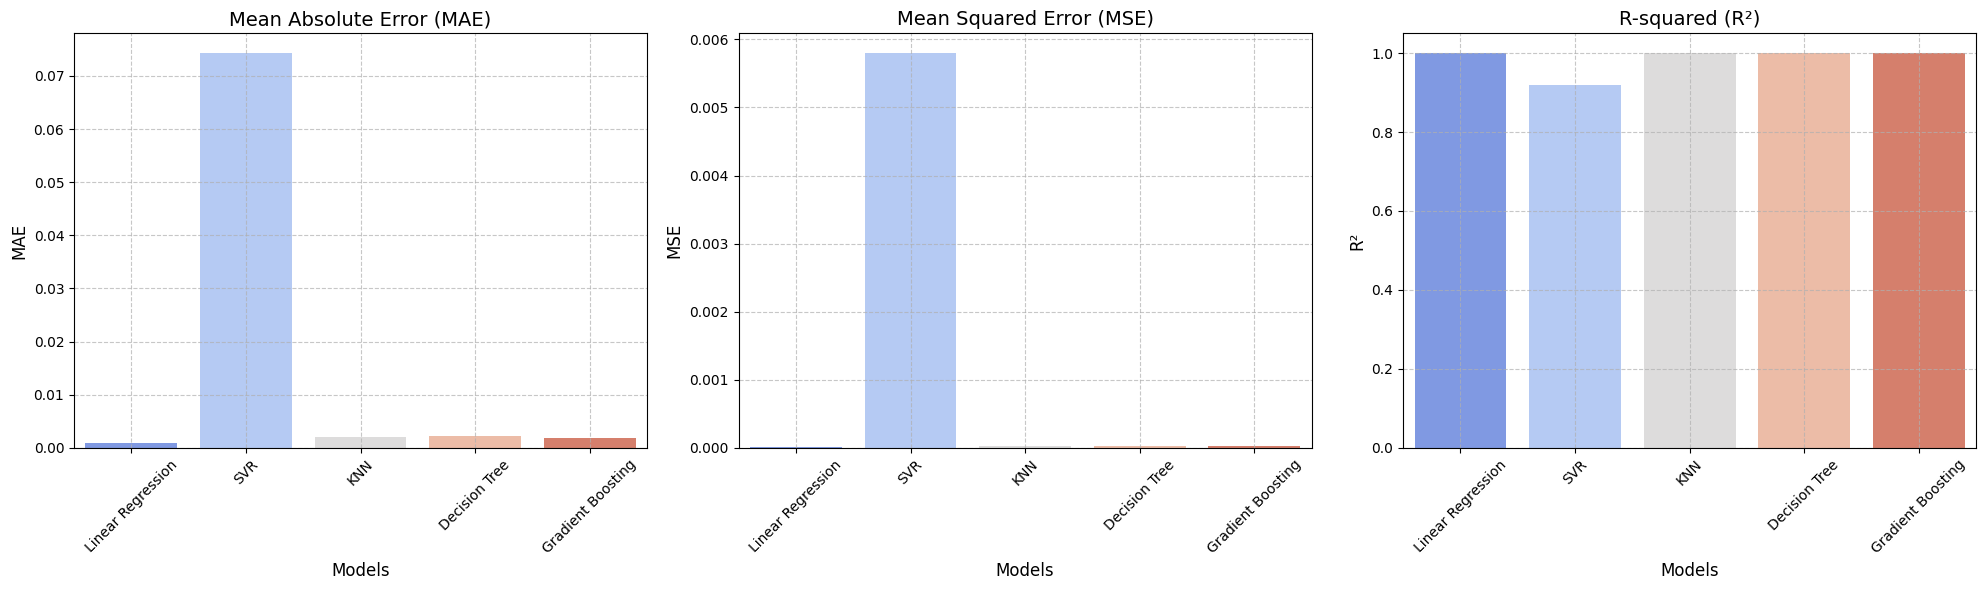

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv('/kaggle/input/selected-features-data/selected_features_data.csv')

X = data.drop(['close'], axis=1)
y = data['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(kernel='rbf'),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

mae_dict = {}
mse_dict = {}
r2_dict = {}

print("Model Performance Metrics:\n")
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mae_dict[model_name] = mae
    mse_dict[model_name] = mse
    r2_dict[model_name] = r2

    print(f"{model_name}:")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  R-squared (R²): {r2:.4f}")
    print("-" * 50)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.barplot(x=list(mae_dict.keys()), y=list(mae_dict.values()), ax=axes[0], palette='coolwarm')
axes[0].set_title('Mean Absolute Error (MAE)', fontsize=14)
axes[0].set_xlabel('Models', fontsize=12)
axes[0].set_ylabel('MAE', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.7)

sns.barplot(x=list(mse_dict.keys()), y=list(mse_dict.values()), ax=axes[1], palette='coolwarm')
axes[1].set_title('Mean Squared Error (MSE)', fontsize=14)
axes[1].set_xlabel('Models', fontsize=12)
axes[1].set_ylabel('MSE', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.7)

sns.barplot(x=list(r2_dict.keys()), y=list(r2_dict.values()), ax=axes[2], palette='coolwarm')
axes[2].set_title('R-squared (R²)', fontsize=14)
axes[2].set_xlabel('Models', fontsize=12)
axes[2].set_ylabel('R²', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


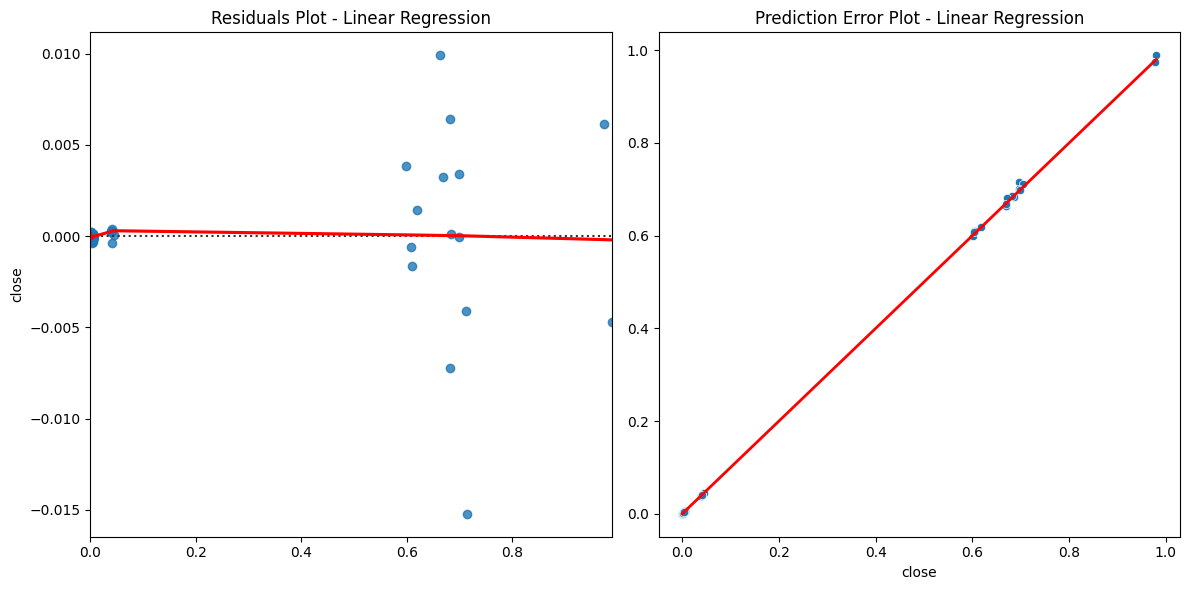

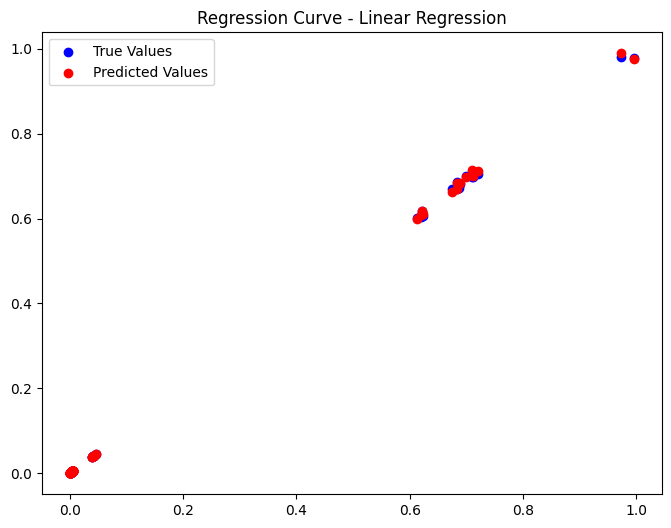

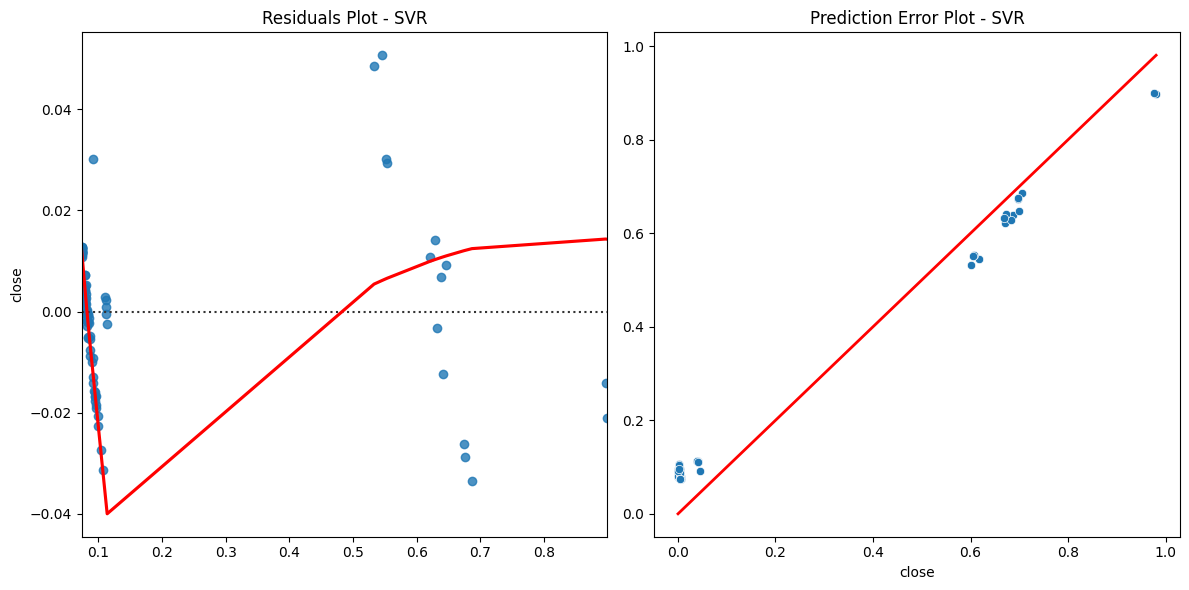

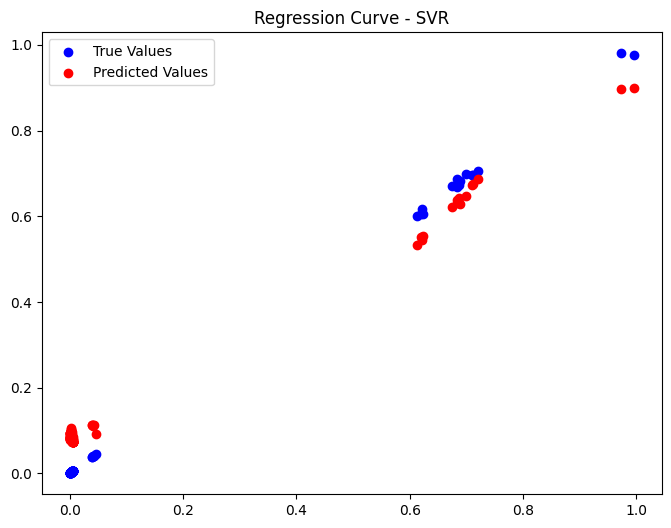

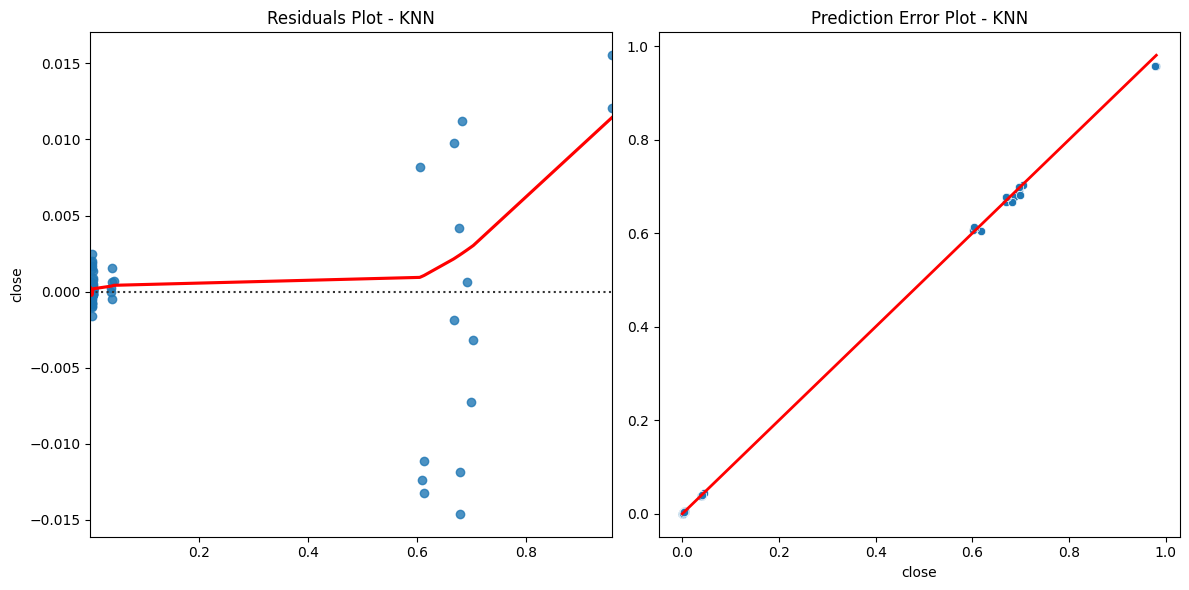

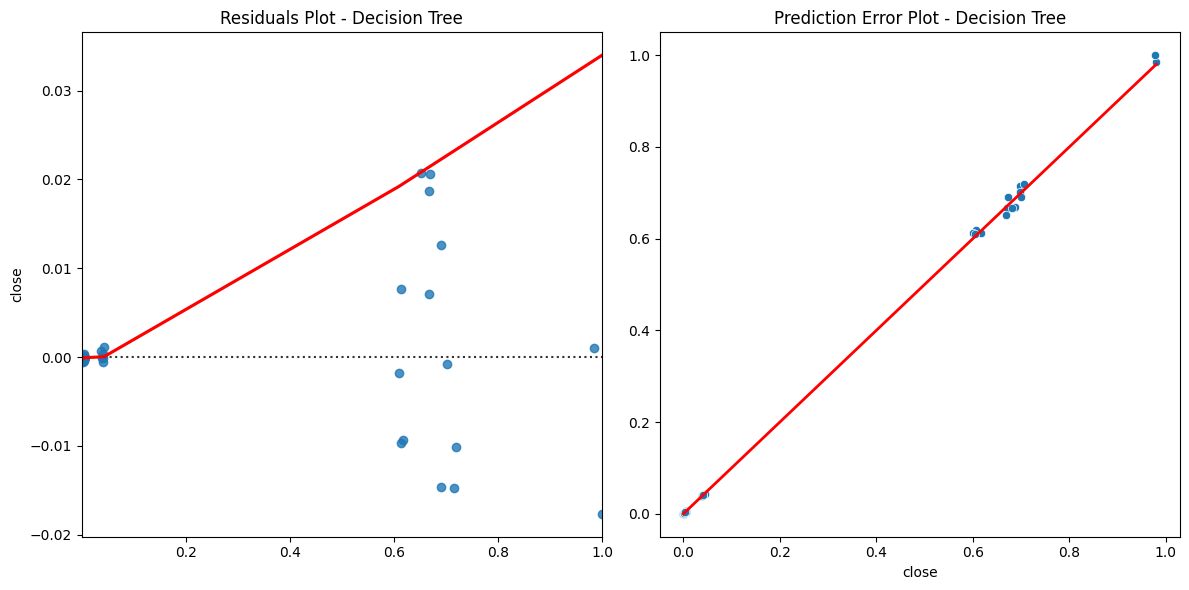

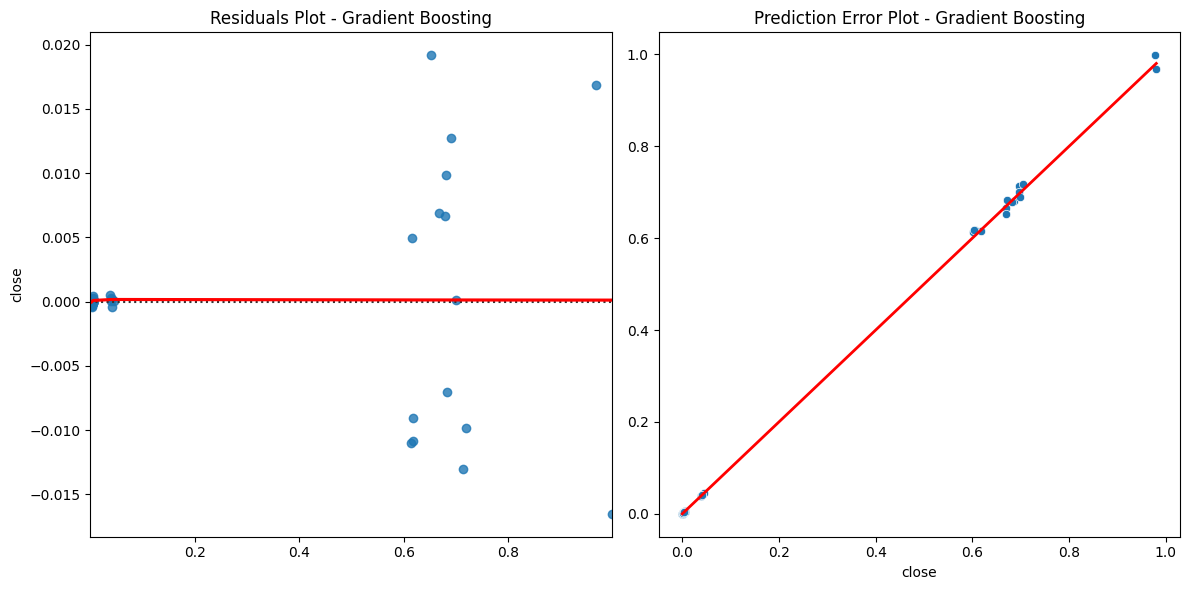

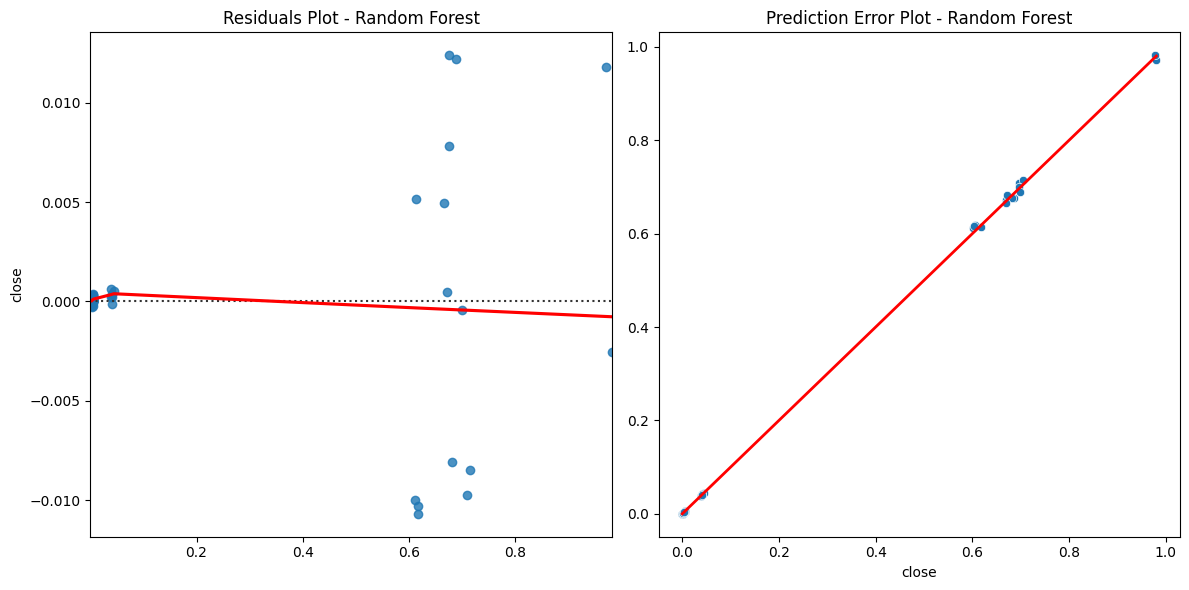

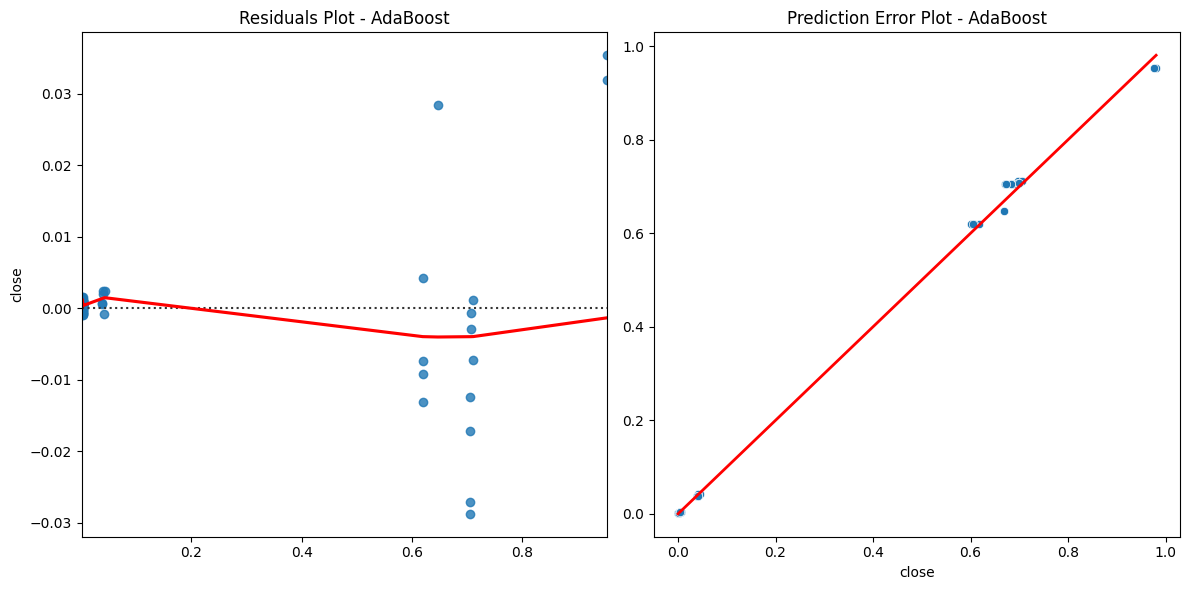

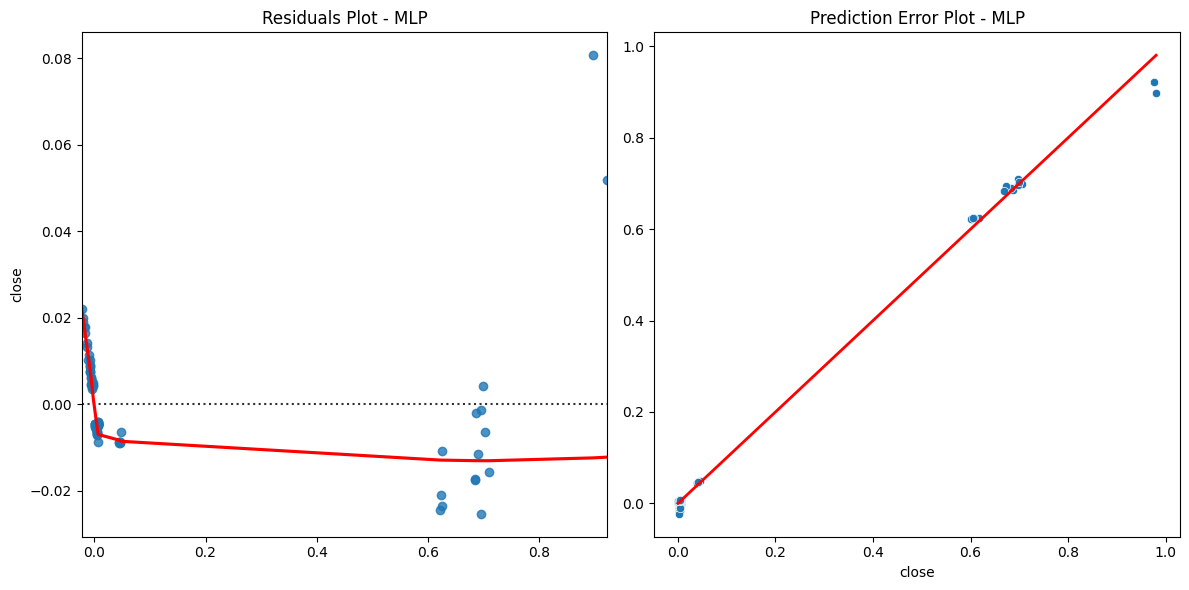

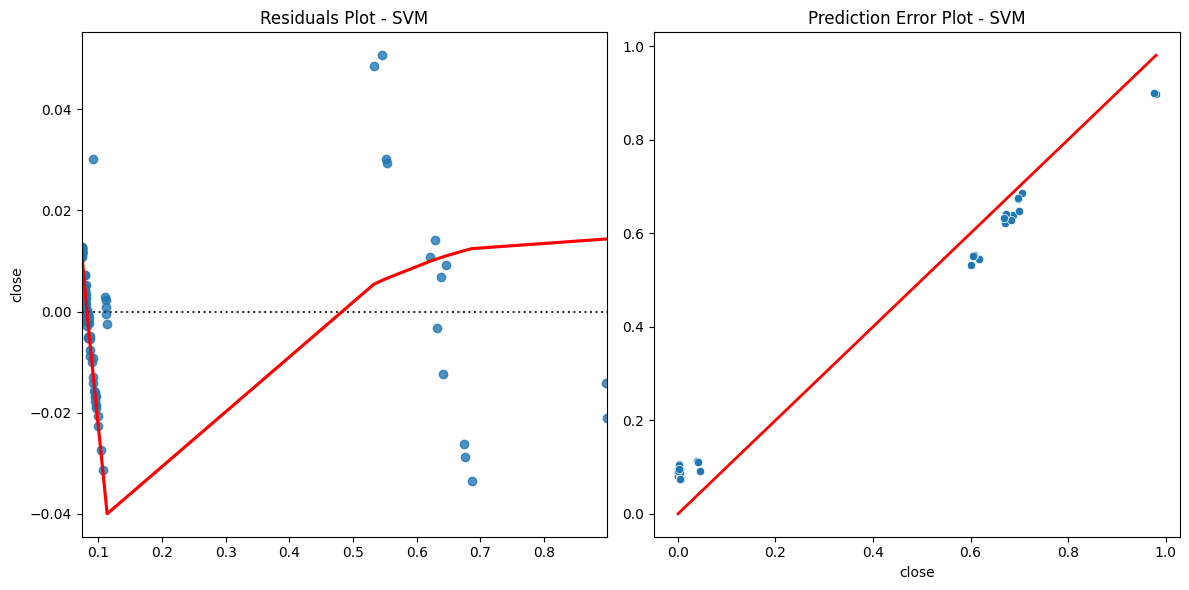

Model Performance Report:
               Model       MAE       MSE      RMSE        R²
0  Linear Regression  0.000950  0.000008  0.002793  0.999891
1                SVR  0.074291  0.005799  0.076153  0.919296
2                KNN  0.002113  0.000025  0.004961  0.999658
3      Decision Tree  0.002178  0.000031  0.005597  0.999564
4  Gradient Boosting  0.001921  0.000024  0.004929  0.999662
5      Random Forest  0.001461  0.000013  0.003663  0.999813
6           AdaBoost  0.003654  0.000072  0.008497  0.998995
7                MLP  0.008842  0.000212  0.014555  0.997052
8                SVM  0.074291  0.005799  0.076153  0.919296


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

data = pd.read_csv('/kaggle/input/selected-features-data/selected_features_data.csv')


X = data[['low', 'open', 'high', 'consumer confidence']]  
y = data['close'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

algorithms = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "MLP": MLPRegressor(),
    "SVM": SVR()
}

def plot_diagnostics(model, X_test, y_test, y_pred, algo_name):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    residuals = y_test - y_pred
    sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})  
    plt.title(f'Residuals Plot - {algo_name}')
    
    
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
    plt.title(f'Prediction Error Plot - {algo_name}')
    plt.tight_layout()
    plt.show()

    if algo_name in ['Linear Regression', 'SVR']:
        plt.figure(figsize=(8, 6))
        plt.scatter(X_test['low'], y_test, color='blue', label='True Values')
        plt.scatter(X_test['low'], y_pred, color='red', label='Predicted Values')
        plt.title(f'Regression Curve - {algo_name}')
        plt.legend()
        plt.show()

report = []
for algo_name, model in algorithms.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    report.append({
        'Model': algo_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    })
    
    plot_diagnostics(model, X_test, y_test, y_pred, algo_name)

report_df = pd.DataFrame(report)

print("Model Performance Report:")
print(report_df)

report_df.to_csv("model_performance_report.csv", index=False)


### **Pattern Extractions**

In [40]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules


data = pd.read_csv('/kaggle/input/selected-features-data/selected_features_data.csv')

thresholds = data.mean() 
data_binarized = data > thresholds

frequent_itemsets = apriori(data_binarized, min_support=0.1, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

print(f"Number of Association Rules Discovered: {len(rules)}")
print(rules.head())


Number of Association Rules Discovered: 100
  antecedents consequents  antecedent support  consequent support   support  \
0      (open)       (low)            0.222222            0.222222  0.222222   
1       (low)      (open)            0.222222            0.222222  0.222222   
2      (high)       (low)            0.222222            0.222222  0.222222   
3       (low)      (high)            0.222222            0.222222  0.222222   
4       (low)     (close)            0.222222            0.222222  0.222222   

   confidence  lift  leverage  conviction  zhangs_metric  
0         1.0   4.5   0.17284         inf            1.0  
1         1.0   4.5   0.17284         inf            1.0  
2         1.0   4.5   0.17284         inf            1.0  
3         1.0   4.5   0.17284         inf            1.0  
4         1.0   4.5   0.17284         inf            1.0  


**Visualizations and Comparisions of Models**

WEKA Models Performance Metrics:
                   Model      R²     MAE    RMSE
0          Random Forest  0.9998  0.0036  0.0064
1      Linear Regression  0.9999  0.0012  0.0034
2                 SMOreg  0.9999  0.0021  0.0049
3        M5P (Batch 100)  0.9999  0.0013  0.0036
4         M5P (Batch 32)  0.9999  0.0013  0.0036
5              KNN (K=1)  0.9997  0.0028  0.0072
6              KNN (K=3)  0.9998  0.0027  0.0065
7              KNN (K=7)  0.9997  0.0033  0.0076
8   KNN (K=15, Batch 32)  0.9994  0.0042  0.0105
9   REP Tree (Batch 100)  0.9992  0.0050  0.0123
10   REP Tree (Batch 32)  0.9992  0.0050  0.0123

Python Models Performance Metrics:
                 Model      R²      MAE     RMSE
0    Linear Regression  0.9999  0.00100  0.07620
1                  SVR  0.9193  0.07430  0.07620
2                  KNN  0.9997  0.00210  0.07620
3        Decision Tree  0.9996  0.00220  0.07620
4    Gradient Boosting  0.9997  0.00190  0.07620
5        Random Forest  0.9998  0.00152  0.00374


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with p

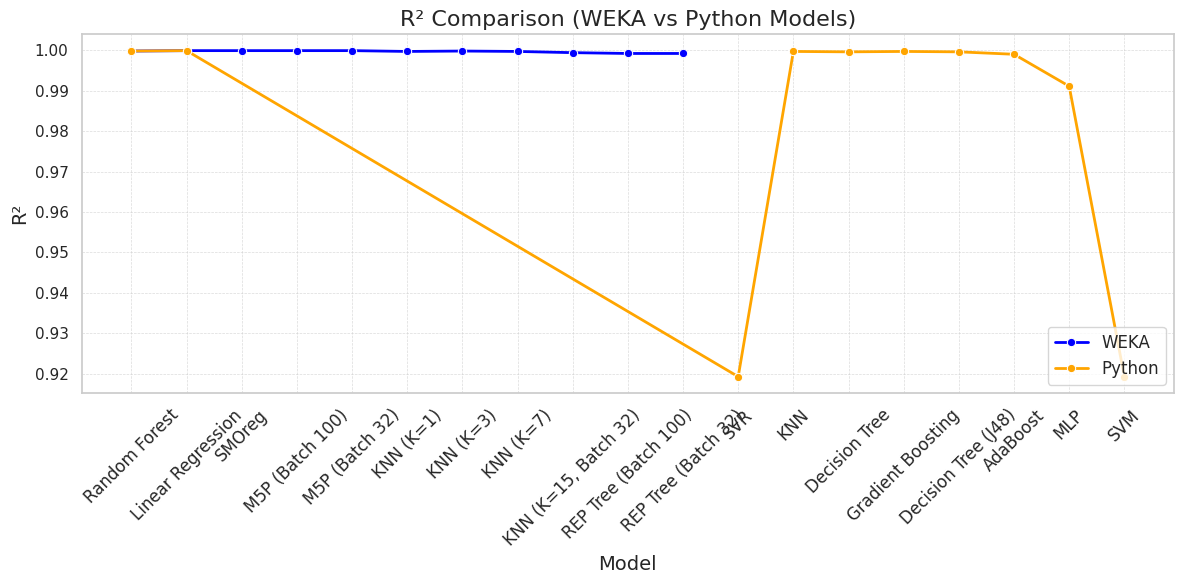

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if

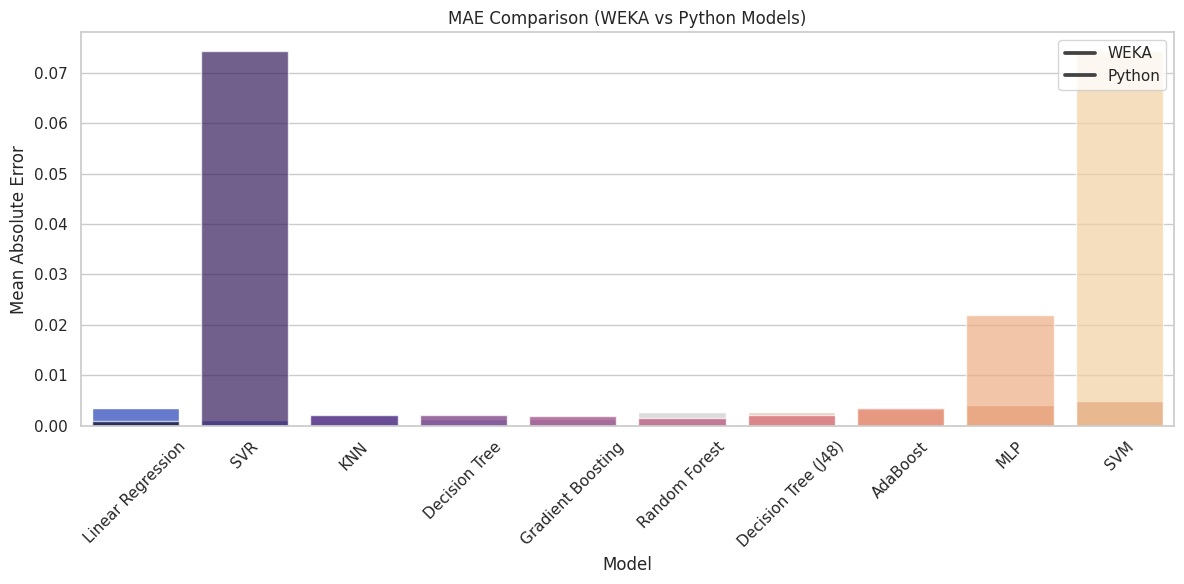

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if

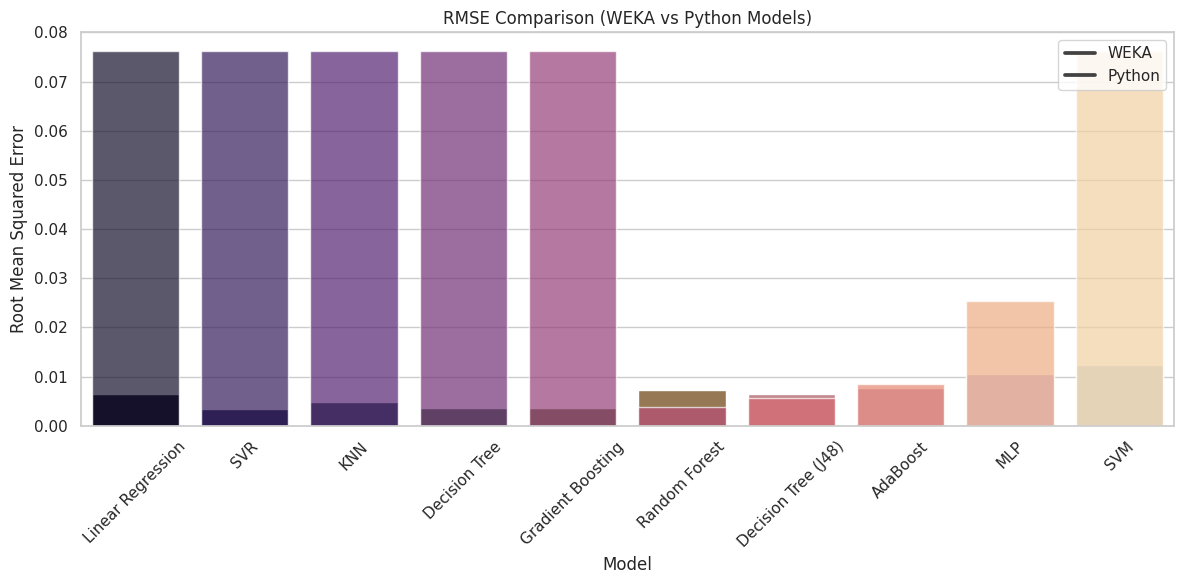

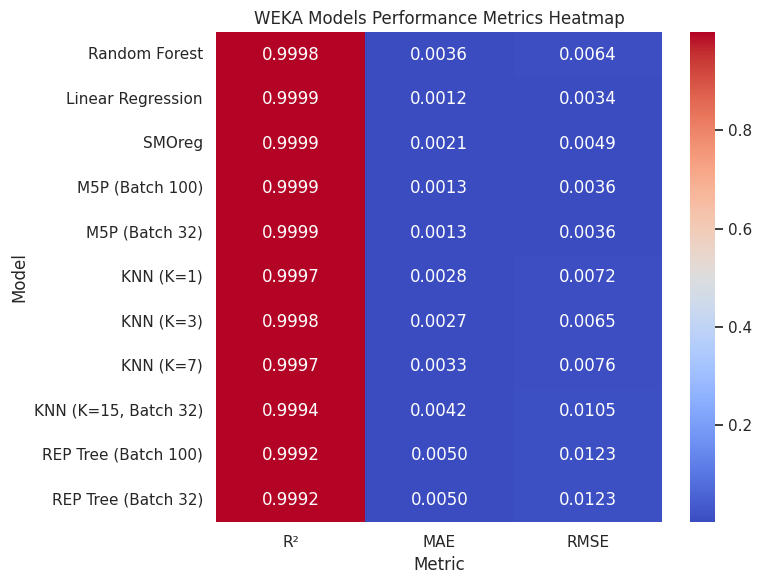

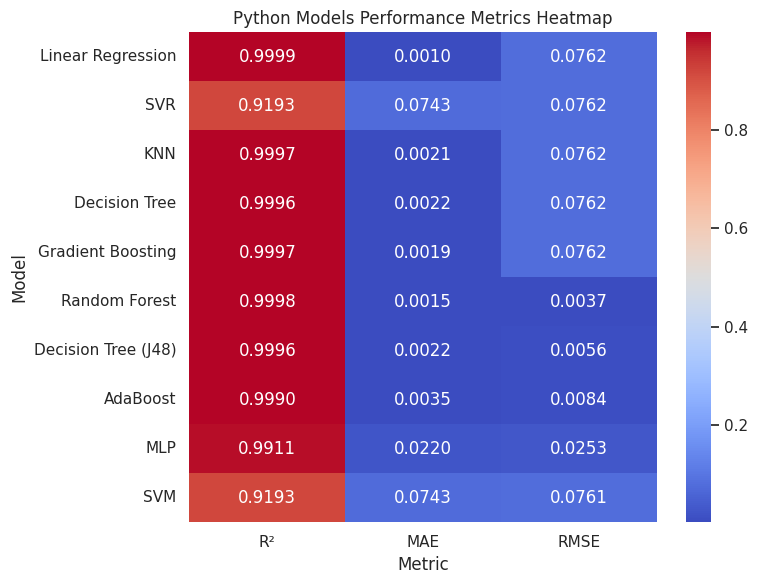

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def visualize_model_comparisons(weka_data, python_data):
    weka_df = pd.DataFrame(weka_data)
    python_df = pd.DataFrame(python_data)

    print("WEKA Models Performance Metrics:")
    print(weka_df)
    print("\nPython Models Performance Metrics:")
    print(python_df)

    sns.set(style="whitegrid")


    plt.figure(figsize=(12, 6))
    sns.lineplot(data=weka_df, x="Model", y="R²", marker="o", label="WEKA", color="blue", linewidth=2)
    sns.lineplot(data=python_df, x="Model", y="R²", marker="o", label="Python", color="orange", linewidth=2)
    plt.title("R² Comparison (WEKA vs Python Models)", fontsize=16)
    plt.xlabel("Model", fontsize=14)
    plt.ylabel("R²", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.barplot(data=weka_df, x="Model", y="MAE", palette="coolwarm", label="WEKA")
    sns.barplot(data=python_df, x="Model", y="MAE", palette="magma", alpha=0.7, label="Python")
    plt.title("MAE Comparison (WEKA vs Python Models)")
    plt.xlabel("Model")
    plt.ylabel("Mean Absolute Error")
    plt.xticks(rotation=45)
    plt.legend(["WEKA", "Python"], loc="upper right")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.barplot(data=weka_df, x="Model", y="RMSE", palette="cubehelix", label="WEKA")
    sns.barplot(data=python_df, x="Model", y="RMSE", palette="magma", alpha=0.7, label="Python")
    plt.title("RMSE Comparison (WEKA vs Python Models)")
    plt.xlabel("Model")
    plt.ylabel("Root Mean Squared Error")
    plt.xticks(rotation=45)
    plt.legend(["WEKA", "Python"], loc="upper right")
    plt.tight_layout()
    plt.show()

    weka_heatmap = weka_df.set_index("Model")[["R²", "MAE", "RMSE"]]
    plt.figure(figsize=(8, 6))
    sns.heatmap(weka_heatmap, annot=True, cmap="coolwarm", fmt=".4f", cbar=True)
    plt.title("WEKA Models Performance Metrics Heatmap")
    plt.xlabel("Metric")
    plt.ylabel("Model")
    plt.tight_layout()
    plt.show()

    python_heatmap = python_df.set_index("Model")[["R²", "MAE", "RMSE"]]
    plt.figure(figsize=(8, 6))
    sns.heatmap(python_heatmap, annot=True, cmap="coolwarm", fmt=".4f", cbar=True)
    plt.title("Python Models Performance Metrics Heatmap")
    plt.xlabel("Metric")
    plt.ylabel("Model")
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    weka_data = {
        "Model": [
            "Random Forest", 
            "Linear Regression", 
            "SMOreg", 
            "M5P (Batch 100)", 
            "M5P (Batch 32)", 
            "KNN (K=1)", 
            "KNN (K=3)", 
            "KNN (K=7)", 
            "KNN (K=15, Batch 32)", 
            "REP Tree (Batch 100)", 
            "REP Tree (Batch 32)"
        ],
        "R²": [0.9998, 0.9999, 0.9999, 0.9999, 0.9999, 0.9997, 0.9998, 0.9997, 0.9994, 0.9992, 0.9992],
        "MAE": [0.0036, 0.0012, 0.0021, 0.0013, 0.0013, 0.0028, 0.0027, 0.0033, 0.0042, 0.005, 0.005],
        "RMSE": [0.0064, 0.0034, 0.0049, 0.0036, 0.0036, 0.0072, 0.0065, 0.0076, 0.0105, 0.0123, 0.0123]
    }


    python_data = {
        "Model": [
            "Linear Regression", 
            "SVR", 
            "KNN", 
            "Decision Tree", 
            "Gradient Boosting", 
            "Random Forest", 
            "Decision Tree (J48)", 
            "AdaBoost", 
            "MLP", 
            "SVM"
        ],
        "R²": [0.9999, 0.9193, 0.9997, 0.9996, 0.9997, 0.9998, 0.9996, 0.9990, 0.9911, 0.9193],
        "MAE": [0.0010, 0.0743, 0.0021, 0.0022, 0.0019, 0.00152, 0.00216, 0.00350, 0.02203, 0.07429],
        "RMSE": [0.0762, 0.0762, 0.0762, 0.0762, 0.0762, 0.00374, 0.00560, 0.00844, 0.02531, 0.07615]
    }

    visualize_model_comparisons(weka_data, python_data)


**Pattern Extractions**

Dataset Overview:
              low        open        high  consumer confidence       close
count  432.000000  432.000000  432.000000           432.000000  432.000000
mean     0.169896    0.167878    0.170971             0.530245    0.168494
std      0.306664    0.303405    0.309570             0.288925    0.304673
min      0.000000    0.000000    0.000000             0.000000    0.000000
25%      0.002349    0.002322    0.002208             0.233844    0.002312
50%      0.004654    0.004620    0.004583             0.567075    0.004617
75%      0.043809    0.043031    0.043230             0.776323    0.043168
max      1.000000    1.000000    1.000000             1.000000    1.000000

Correlation Matrix:
                          low      open      high  consumer confidence  \
low                  1.000000  0.999806  0.999779             0.093059   
open                 0.999806  1.000000  0.999781             0.092283   
high                 0.999779  0.999781  1.000000             0.

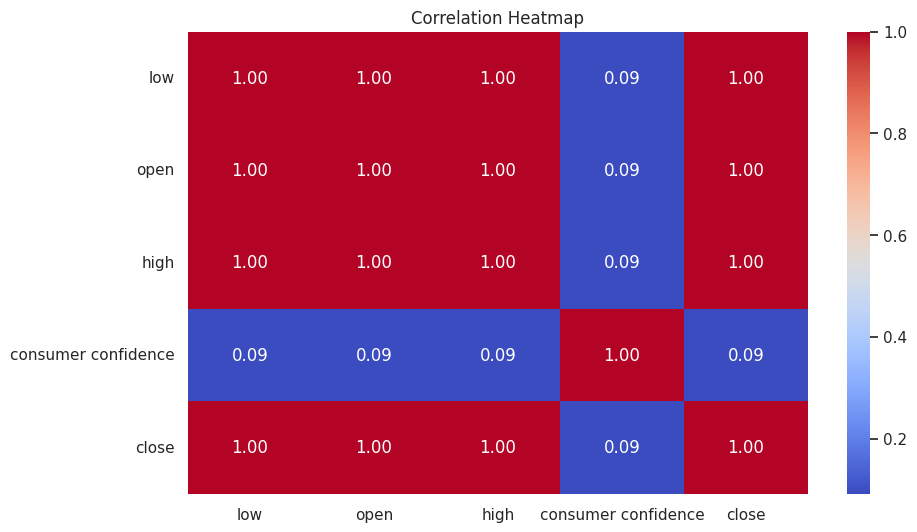

/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



Feature Importances:
               Feature  Importance
1                 open    0.363799
0                  low    0.322881
2                 high    0.313253
3  consumer confidence    0.000068


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


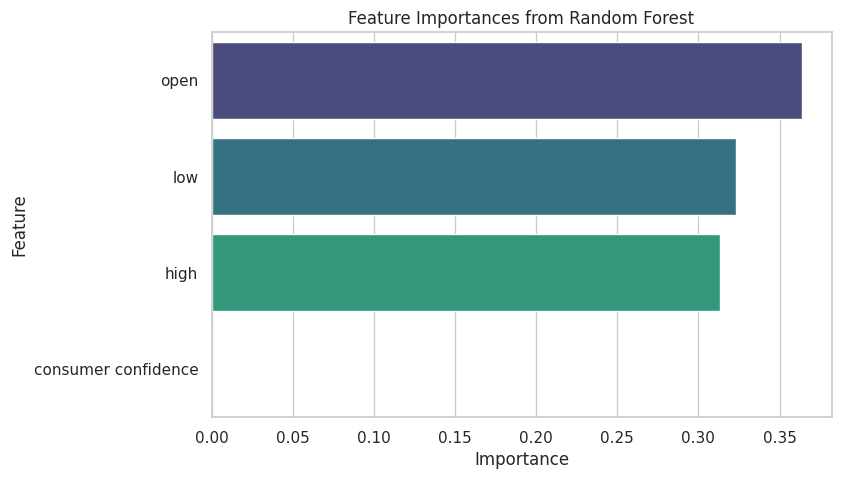

/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



Mutual Information Scores:
high                   3.113837
low                    3.089163
open                   2.642503
consumer confidence    1.151180
dtype: float64


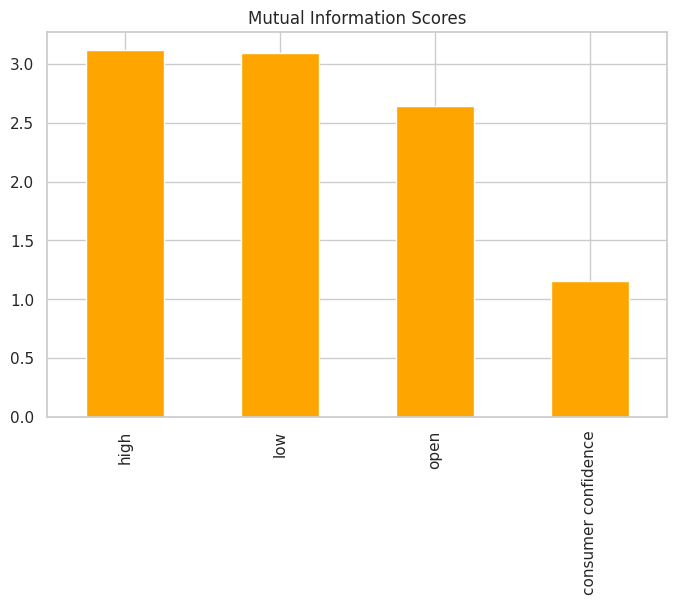

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if

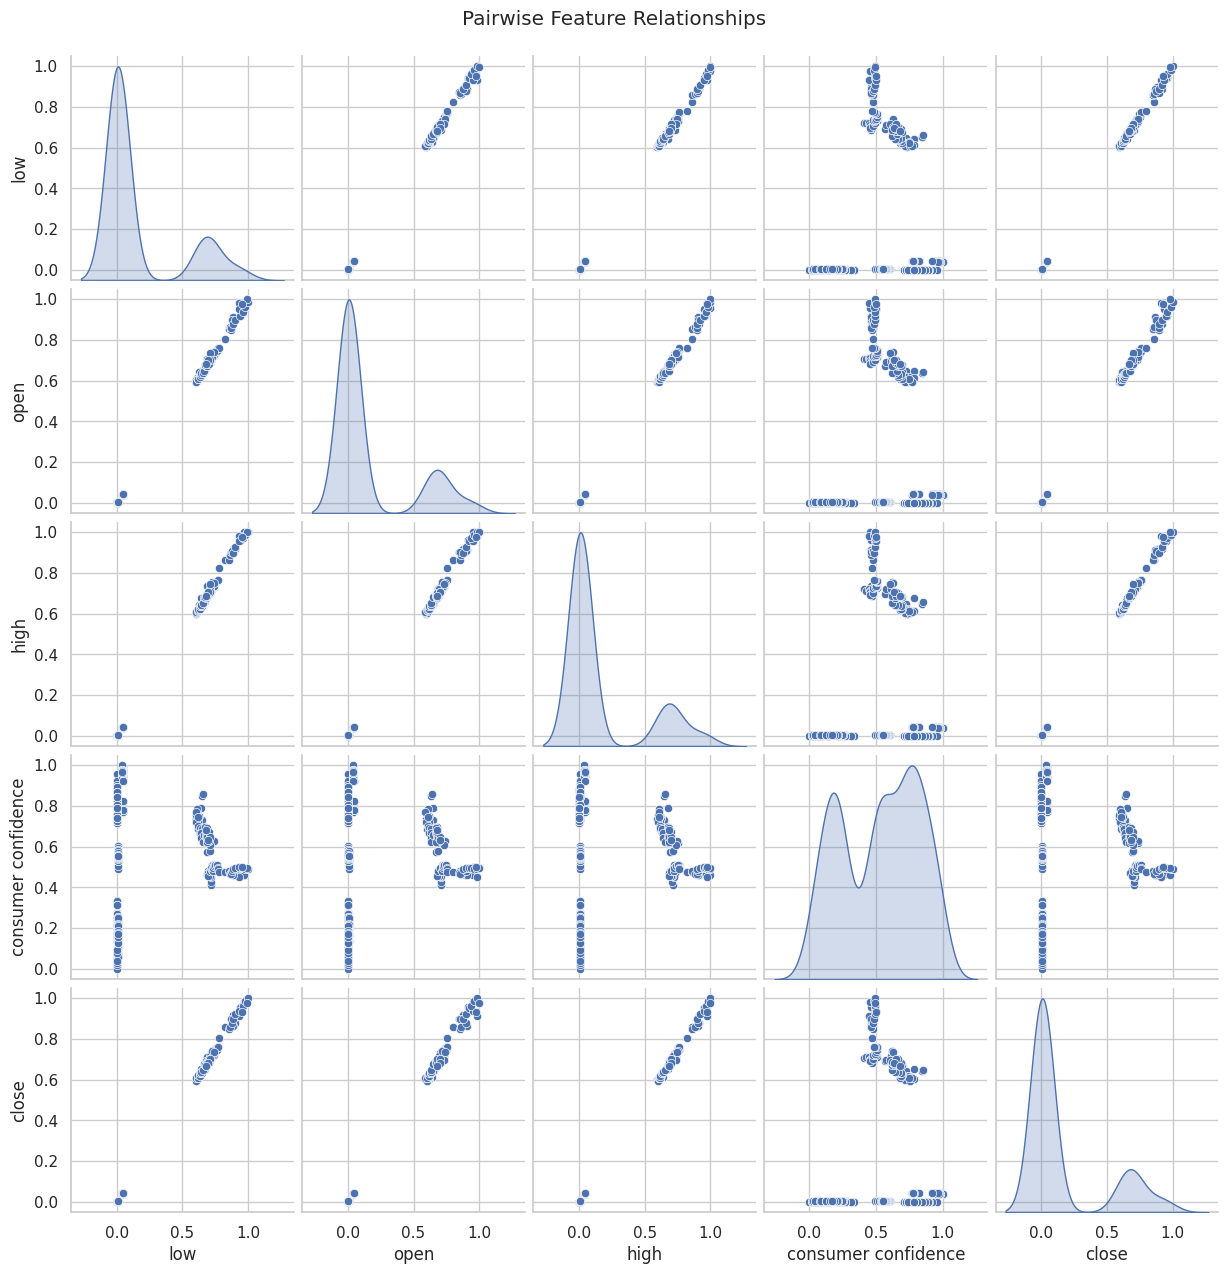

/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


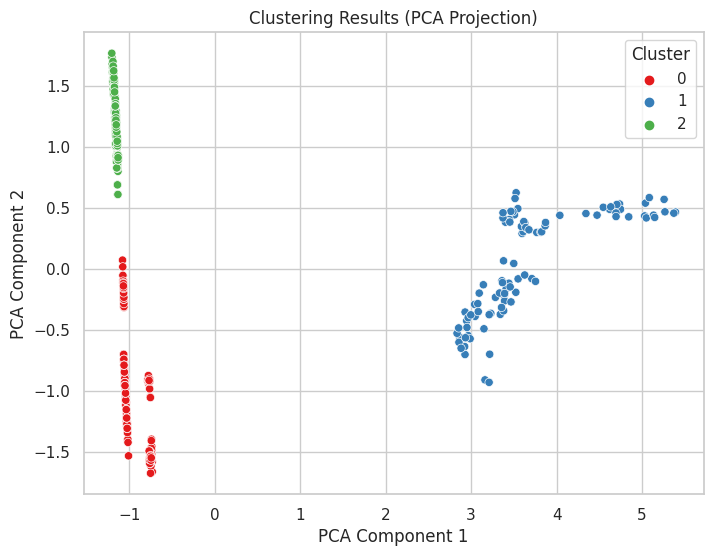

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression


file_path = '/kaggle/input/selected-features-data/selected_features_data.csv' 
df = pd.read_csv(file_path)

print("Dataset Overview:")
print(df.describe())

# 1. Correlation Analysis
print("\nCorrelation Matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)

# Heatmap for visualization
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 2. Feature Importance with Random Forest
X = df.drop(columns=['close'])  
y = df['close']  

# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

# Bar plot for visualization
plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importances from Random Forest")
plt.show()

# 3. Mutual Information
mutual_info = mutual_info_regression(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)

print("\nMutual Information Scores:")
print(mutual_info_series)

# Bar plot for visualization
plt.figure(figsize=(8, 5))
mutual_info_series.plot(kind='bar', color='orange')
plt.title("Mutual Information Scores")
plt.show()

# 4. Pairplot for Visual Exploration
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

# 5. Clustering (Optional: for discovering groups or trends)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df['Cluster'] = clusters

# Visualize clusters (e.g., PCA projection)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Cluster'], palette='Set1')
plt.title("Clustering Results (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


Dataset Overview:
              low        open        high  consumer confidence       close
count  432.000000  432.000000  432.000000           432.000000  432.000000
mean     0.169896    0.167878    0.170971             0.530245    0.168494
std      0.306664    0.303405    0.309570             0.288925    0.304673
min      0.000000    0.000000    0.000000             0.000000    0.000000
25%      0.002349    0.002322    0.002208             0.233844    0.002312
50%      0.004654    0.004620    0.004583             0.567075    0.004617
75%      0.043809    0.043031    0.043230             0.776323    0.043168
max      1.000000    1.000000    1.000000             1.000000    1.000000

Correlation Matrix:
                          low      open      high  consumer confidence  \
low                  1.000000  0.999806  0.999779             0.093059   
open                 0.999806  1.000000  0.999781             0.092283   
high                 0.999779  0.999781  1.000000             0.

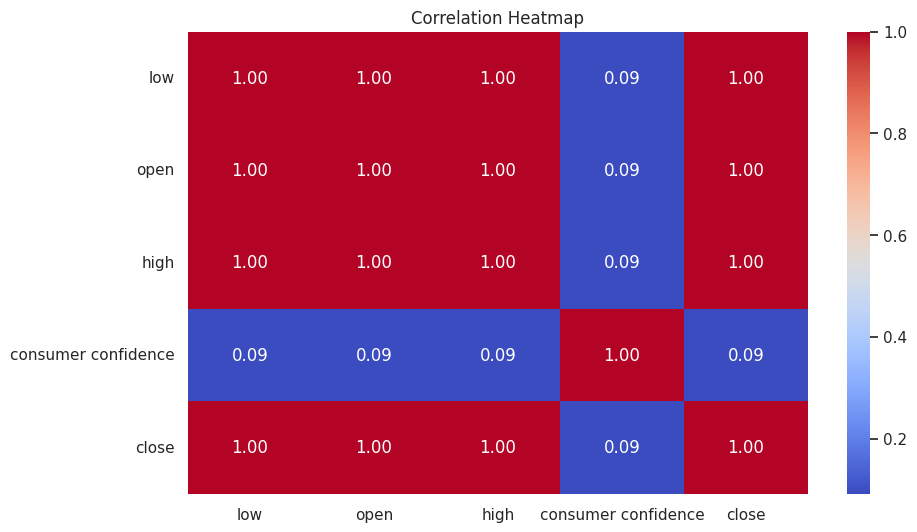


Number of Strong Correlation Patterns (|correlation| > 0.7): 12

Feature Importances:
               Feature  Importance
1                 open    0.363799
0                  low    0.322881
2                 high    0.313253
3  consumer confidence    0.000068


/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


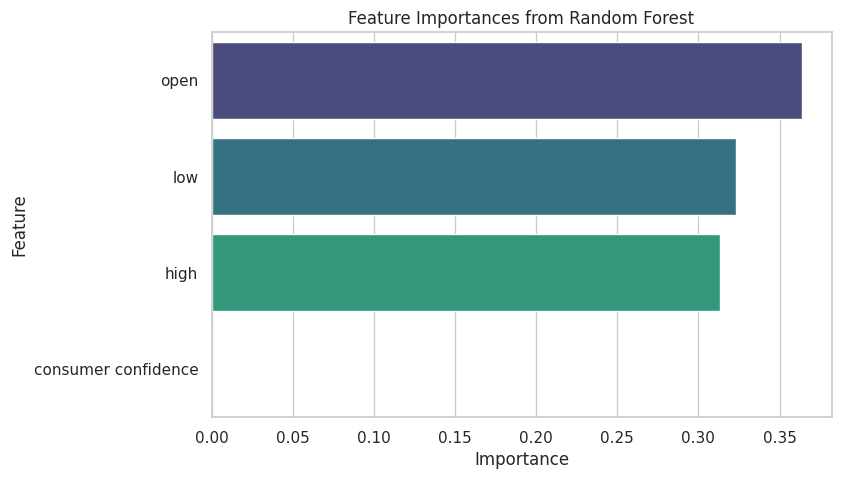


Number of Significant Features (Importance > 0.05): 3

Mutual Information Scores:
high                   3.115596
low                    3.088923
open                   2.643238
consumer confidence    1.149150
dtype: float64


/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


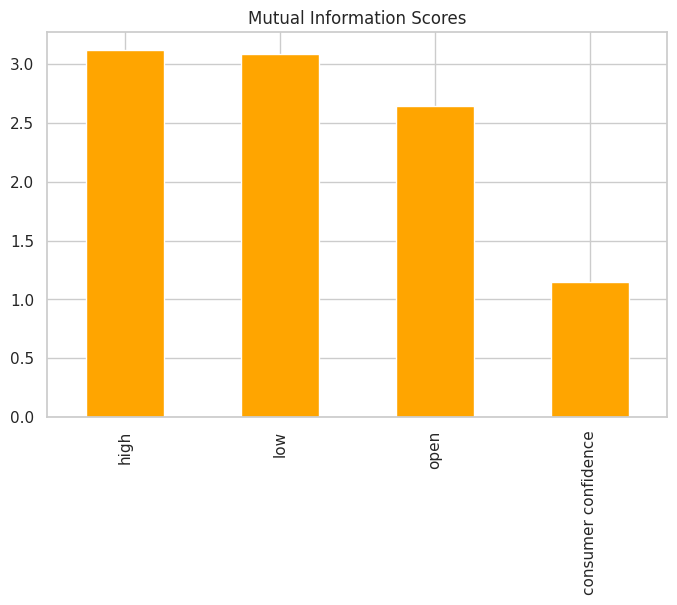


Number of Significant Mutual Information Patterns (MI > 0.05): 4


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if

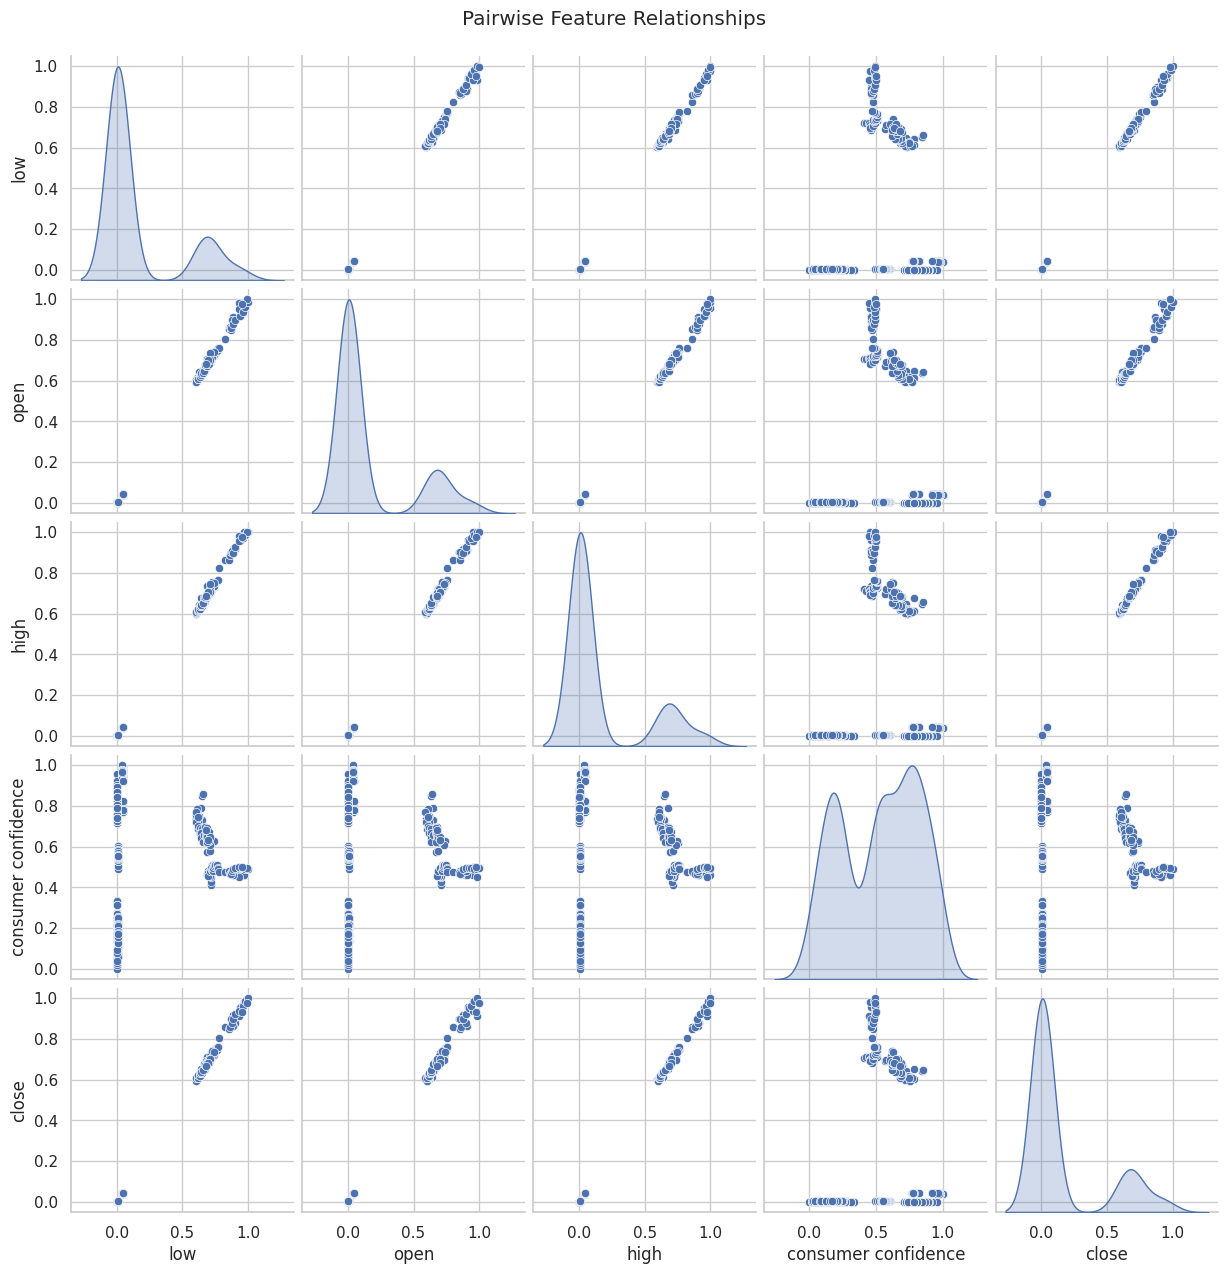

/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


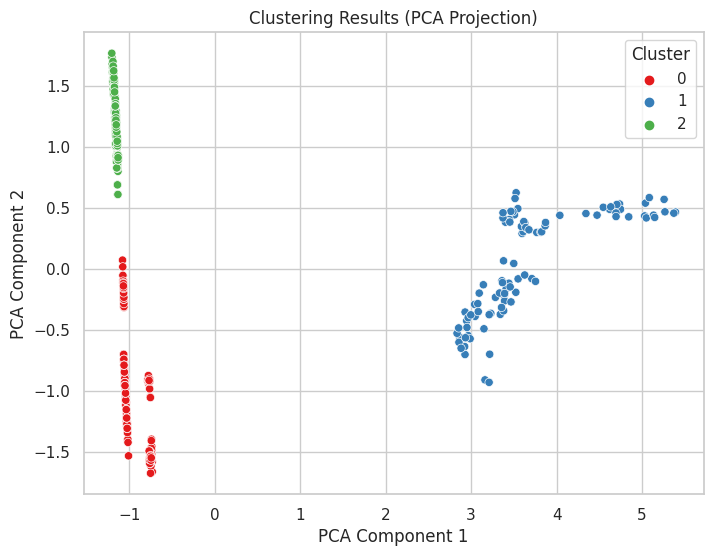


Number of Clusters Detected: 3
Cluster Distribution:
Cluster
0    192
2    144
1     96
Name: count, dtype: int64

Number of Significant Principal Components (Variance > 5%): 2


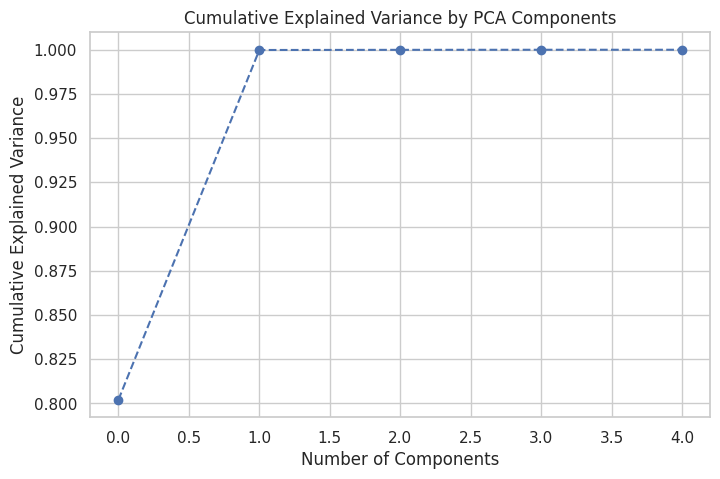

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
file_path = '/kaggle/input/selected-features-data/selected_features_data.csv'  
df = pd.read_csv(file_path)

print("Dataset Overview:")
print(df.describe())

# 1. Correlation Analysis
print("\nCorrelation Matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Count significant correlations
significant_correlations = correlation_matrix[(correlation_matrix > 0.7) & (correlation_matrix < 1.0)].count().sum()
print(f"\nNumber of Strong Correlation Patterns (|correlation| > 0.7): {significant_correlations}")

# 2. Feature Importance with Random Forest
X = df.drop(columns=['close'])  
y = df['close'] 

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importances from Random Forest")
plt.show()

significant_features = feature_importances[feature_importances['Importance'] > 0.05]
print(f"\nNumber of Significant Features (Importance > 0.05): {len(significant_features)}")

# 3. Mutual Information
mutual_info = mutual_info_regression(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)

print("\nMutual Information Scores:")
print(mutual_info_series)

plt.figure(figsize=(8, 5))
mutual_info_series.plot(kind='bar', color='orange')
plt.title("Mutual Information Scores")
plt.show()

significant_mi = mutual_info_series[mutual_info_series > 0.05]
print(f"\nNumber of Significant Mutual Information Patterns (MI > 0.05): {len(significant_mi)}")

# 4. Pairplot for Visual Exploration
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

# 5. Clustering 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df['Cluster'] = clusters

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Cluster'], palette='Set1')
plt.title("Clustering Results (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

unique_clusters = df['Cluster'].nunique()
print(f"\nNumber of Clusters Detected: {unique_clusters}")
cluster_distribution = df['Cluster'].value_counts()
print(f"Cluster Distribution:\n{cluster_distribution}")

# 6. PCA Variance Analysis
pca_full = PCA()
pca_full.fit(scaled_data)
variance_ratios = pca_full.explained_variance_ratio_
significant_components = sum(variance_ratios > 0.05)
print(f"\nNumber of Significant Principal Components (Variance > 5%): {significant_components}")

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(variance_ratios), marker='o', linestyle='--', color='b')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()
